# 1.0 Common commands
Following actions are performed in this section:
*   Google drive is mounted
*   Required packages are is installed and updated
*   Required libraries are imported
*   Custom functions (for dataframe optimisation, group plot and pie chart) are written

## 1.1 Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> All the relevant files can be accessed through the following link: https://drive.google.com/drive/folders/1evFZRwFWh4zkR9CiT46llB9PlaXFLfLA?usp=sharing

## 1.2 Install packages
pyod is installed and updated

In [ ]:
'''In this code cell, all the relevant packages are installed and updated'''

!pip install pyod
!pip install --upgrade pyod

## 1.3 Import libraries
Some libraries imported here may not be used. They were imported while trying different approach.

In [ ]:
'''In this code cell, all the relevant libraries are imported'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from google.colab import files
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 1.4 Define custom functions

Dataframe optimiser

In [ ]:
'''In this code cell a function called dataframe_optimizer is defined. This will be used to 
reduce space consumption by dataframes.'''

#Credit - https://www.kaggle.com/rinnqd/reduce-memory-usage and 
#https://www.analyticsvidhya.com/blog/2021/04/how-to-reduce-memory-usage-in-python-pandas/
def dataframe_optimizer(df):
  '''This is a dataframe optimizer'''
  start_mem=np.round(df.memory_usage().sum()/1024**2,2)    
  for col in df.columns:
    col_type=df[col].dtype        
    if col_type!=object:
      c_min=df[col].min()
      c_max=df[col].max()
      if str(col_type)[:3]=='int':
        if c_min>np.iinfo(np.int8).min and c_max<np.iinfo(np.int8).max:
            df[col]=df[col].astype(np.int8)
        elif c_min>np.iinfo(np.int16).min and c_max<np.iinfo(np.int16).max:
            df[col]=df[col].astype(np.int16)
        elif c_min>np.iinfo(np.int32).min and c_max<np.iinfo(np.int32).max:
            df[col]=df[col].astype(np.int32)
        elif c_min>np.iinfo(np.int64).min and c_max<np.iinfo(np.int64).max:
            df[col]=df[col].astype(np.int64)  
      else:
        if c_min>np.finfo(np.float16).min and c_max<np.finfo(np.float16).max:
            df[col]=df[col].astype(np.float16)
        elif c_min>np.finfo(np.float32).min and c_max<np.finfo(np.float32).max:
            df[col]=df[col].astype(np.float32)
        else:
            df[col]=df[col].astype(np.float64)
  end_mem=np.round(df.memory_usage().sum()/1024**2,2)
  return df

Function for group plot

In [ ]:
'''In this code cell, a function to plot group plot is defined'''

def group_plot(size, y_axis_0, y_axis_1, classes, x_label, y_label, legend, title):  
  '''This is a custom function to draw group plot'''
  x = np.arange(len(y_axis_0))
  width = 0.4
  plt.figure(figsize=size)
  plt.bar(x-0.2, y_axis_0, width, color='green')
  plt.bar(x+0.2, y_axis_1, width, color='red')
  plt.xticks(x, classes, rotation=90)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(legend)
  plt.title(title)
  plt.show()

Function for pie chart

In [ ]:
'''In this code cell, a function to plot pie chart is defined'''

def pie_chart(size, category, labels, title):
  '''This is a custom function to draw pie chart'''
  plt.figure(figsize = size)
  plt.pie(category, autopct='%1.2f%%')
  plt.legend(labels)
  plt.title(title)
  plt.show()

# 2.0 Data set level analysis
After importing relavant data, following analysis are performed in this section:
*   Analysis on common items across different data sets
*   Analysis based on missing values


## 2.1 Import relevant data

In [ ]:
'''In this code cell, data is read.'''

#Read application_train.csv
application_train = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/application_train.csv')

#Read application_test.csv
application_test = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/application_test.csv')

#Read bureau.csv
bureau = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/bureau.csv')

#Read previous_application.csv
previous_application = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/previous_application.csv')

## 2.2 Analysis on common items across different data sets

In [ ]:
'''In this code cell, count of applicants and set opration is performed for applicants from 
application_train, bureau and previous_application.'''

application_train_id = application_train['SK_ID_CURR'].to_numpy()
print('Total application in application_train: ', len(application_train_id))
bureau_id = bureau['SK_ID_CURR'].to_numpy()
print('Total unique application in bureau: ', len(set(bureau_id)))
previous_application_id = previous_application['SK_ID_CURR'].to_numpy()
print('Total unique application in previous: ', len(set(previous_application_id)))

print('-'*100)

application_train_not_in_bureau = np.array(list(set(application_train_id) - set(bureau_id)))
print('Number of appl ication in application_train but not in bureau: ', len(application_train_not_in_bureau))
print('Percentage of application not in bureau: ', (len(application_train_not_in_bureau)/len(application_train_id))*100)
application_train_not_in_bureau_columns = ((len(set(application_train.columns) - set(bureau.columns)))/len(set(application_train.columns)))*100
print('Percentage of columns from application that are not in bureau: ', application_train_not_in_bureau_columns)

print('-'*100)

application_train_not_in_previous = np.array(list(set(application_train_id) - set(previous_application_id)))
print('Number of application in application_train but not in previous: ', len(application_train_not_in_previous))
print('Percentage of application not in previous: ', (len(application_train_not_in_previous)/len(application_train_id))*100)
application_train_not_in_previous_columns = ((len(set(application_train.columns) - set(previous_application.columns)))/len(set(application_train.columns)))*100
print('Percentage of columns from application that are not in previous: ', application_train_not_in_previous_columns)

print('-'*100)

application_train_not_in_bureau_not_in_previous = np.array(list(set(application_train_id) - set(bureau_id) - set(previous_application_id)))
print('Number of application in application_train but neither in bureau nor in previous: ', len(application_train_not_in_bureau_not_in_previous))
print('Percentage of application in application_train but neither in bureau nor in previous: ', (len(application_train_not_in_bureau_not_in_previous)/len(application_train_id))*100)
application_train_in_bureau_in_previous = np.array(list(set(application_train_id) & set(bureau_id) & set(previous_application_id)))
print('Number of application from application_train both in bureau and in previous: ', len(application_train_in_bureau_in_previous))
print('Percentage of application from application_train both in bureau and in previous: ', (len(application_train_in_bureau_in_previous)/len(application_train_id))*100)

Total application in application_train:  307511
Total unique application in bureau:  305811
Total unique application in previous:  338857
----------------------------------------------------------------------------------------------------
Number of appl ication in application_train but not in bureau:  44020
Percentage of application not in bureau:  14.314935075493235
Percentage of columns from application that are not in bureau:  98.36065573770492
----------------------------------------------------------------------------------------------------
Number of application in application_train but not in previous:  16454
Percentage of application not in previous:  5.350702901684818
Percentage of columns from application that are not in previous:  93.44262295081968
----------------------------------------------------------------------------------------------------
Number of application in application_train but neither in bureau nor in previous:  2470
Percentage of application in application_

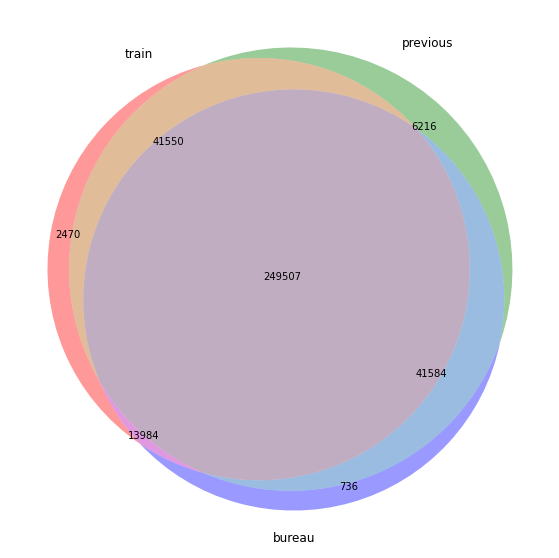

In [ ]:
'''In this code cell, venn diagram is plotted for unique entries in application_train, bureau and previous_application'''

train_only = len(set(application_train_id) - set(bureau_id) - set(previous_application_id))
previous_only = len(set(previous_application_id) - set(application_train_id) - set(bureau_id))
train_previous_only = len(set(application_train_id) & set(previous_application_id) - set(bureau_id))
bureau_only = len(set(bureau_id) - set(application_train_id) - set(previous_application_id))
train_bureau_only = len(set(application_train_id) & set(bureau_id) - set(previous_application_id))
previous_bureau_only = len(set(previous_application_id) & set(bureau_id) - set(application_train_id))
all = len(set(application_train_id) & set(previous_application_id) & set(bureau_id))
plt.subplots(figsize = (10,10))
venn3(subsets=(train_only, previous_only, train_previous_only, bureau_only, train_bureau_only, previous_bureau_only, all), set_labels=['train', 'previous', 'bureau'])
plt.show()

In [ ]:
'''In this code cell, count of applicants and set opration is performed for applicants from 
application_test, bureau and previous_application.'''

application_test_id = application_test['SK_ID_CURR'].to_numpy()
print('Total application in application_test: ', len(application_test_id))
bureau_id = bureau['SK_ID_CURR'].to_numpy()
print('Total unique application in bureau: ', len(set(bureau_id)))
previous_application_id = previous_application['SK_ID_CURR'].to_numpy()
print('Total unique application in previous: ', len(set(previous_application_id)))

print('-'*100)

application_test_not_in_bureau = np.array(list(set(application_test_id) - set(bureau_id)))
print('Number of application in application_test but not in bureau: ', len(application_test_not_in_bureau))
print('Percentage of application not in bureau: ', (len(application_test_not_in_bureau)/len(application_test_id))*100)
application_test_not_in_bureau_columns = ((len(set(application_test.columns) - set(bureau.columns)))/len(set(application_test.columns)))*100
print('Percentage of columns from application that are not in bureau: ', application_test_not_in_bureau_columns)

print('-'*100)

application_test_not_in_previous = np.array(list(set(application_test_id) - set(previous_application_id)))
print('Number of application in application_test but not in previous: ', len(application_test_not_in_bureau))
print('Percentage of application not in previous: ', (len(application_test_not_in_previous)/len(application_test_id))*100)
application_test_not_in_previous_columns = ((len(set(application_test.columns) - set(previous_application.columns)))/len(set(application_test.columns)))*100
print('Percentage of columns from application that are not in previous: ', application_test_not_in_previous_columns)

print('-'*100)

application_test_not_in_bureau_not_in_previous = np.array(list(set(application_test_id) - set(bureau_id) - set(previous_application_id)))
print('Number of application in application_test but neither in bureau nor in previous: ', len(application_test_not_in_bureau_not_in_previous))
print('Percentage of application neither in bureau nor in previous: ', (len(application_test_not_in_bureau_not_in_previous)/len(application_test_id))*100)
application_test_in_bureau_in_previous = np.array(list(set(application_test_id) & set(bureau_id) & set(previous_application_id)))
print('Number of application in application_test both in bureau and in previous: ', len(application_test_in_bureau_in_previous))
print('Percentage of application in application_test both in bureau and in previous: ', (len(application_test_in_bureau_in_previous)/len(application_test_id))*100)

Total application in application_test:  48744
Total unique application in bureau:  305811
Total unique application in previous:  338857
----------------------------------------------------------------------------------------------------
Number of application in application_test but not in bureau:  6424
Percentage of application not in bureau:  13.179057935335631
Percentage of columns from application that are not in bureau:  98.34710743801654
----------------------------------------------------------------------------------------------------
Number of application in application_test but not in previous:  6424
Percentage of application not in previous:  1.9366486131626455
Percentage of columns from application that are not in previous:  93.38842975206612
----------------------------------------------------------------------------------------------------
Number of application in application_test but neither in bureau nor in previous:  208
Percentage of application neither in bureau nor i

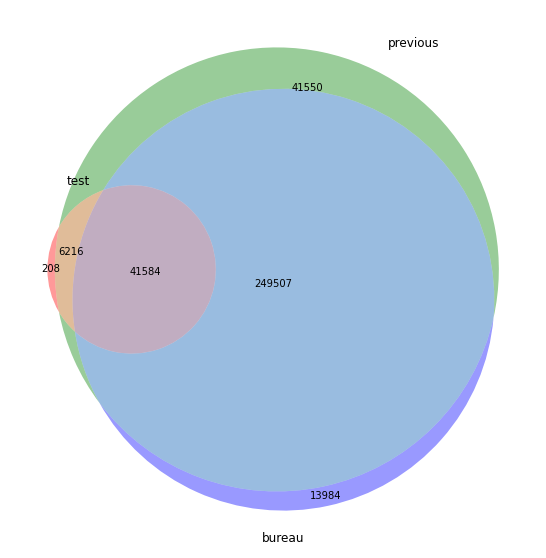

In [ ]:
'''In this code cell, venn diagram is plotted for unique entries in application_test, bureau and previous_application'''

test_only = len(set(application_test_id) - set(bureau_id) - set(previous_application_id))
previous_only = len(set(previous_application_id) - set(application_test_id) - set(bureau_id))
test_previous_only = len(set(application_test_id) & set(previous_application_id) - set(bureau_id))
bureau_only = len(set(bureau_id) - set(application_test_id) - set(previous_application_id))
test_bureau_only = len(set(application_test_id) & set(bureau_id) - set(previous_application_id))
previous_bureau_only = len(set(previous_application_id) & set(bureau_id) - set(application_test_id))
all = len(set(application_test_id) & set(previous_application_id) & set(bureau_id))
plt.figure(figsize = (10,10))
venn3(subsets=(test_only, previous_only, test_previous_only, bureau_only, test_bureau_only, previous_bureau_only, all), set_labels=['test', 'previous', 'bureau'])
plt.show()

> It is observed that 14.31% of applications from application_train are not available in bureau. 5.35% of applications from application_train are not available in previous_application. Overall 81% of applications from application_train are available either in bureau or in previous_application.
It is observed that 13.18% of applications from application_test are not available in bureau. 1.94% of applications from application_test are not available in previous_application. Overall 85.31% of applications from application_test are available either in bureau or in previous_application. 
It is decided that features/columns from bureau and previous_application shall be added to application_train and application_test as a part of feature engineering to get more features.



## 2.3 Analysis based on missing values

In [ ]:
'''In this code cell, missing values shall be counted for each column in application_train.'''

pd.set_option('max_rows', 400)
pd.set_option('max_colwidth', 400)
column_null_percentage = (application_train.isnull().sum()/application_train.shape[0])*100
print('Percentage of emply cell in each column:')
print(column_null_percentage)
column_null = [column for column in list(application_train.columns) if (application_train[column].isnull().sum()/application_train.shape[0])*100 > 0]
print('Number of columns with null value: ', len(column_null))
print('Columns with null value: ', column_null)
column_no_null = [column for column in list(application_train.columns) if (application_train[column].isnull().sum()/application_train.shape[0])*100 == 0]
print('Number of columns without null value: ', len(column_no_null))
print('Columns without null value: ', column_no_null)

Percentage of emply cell in each column:
SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.

In [ ]:
pd.set_option('max_rows', 400)
pd.set_option('max_colwidth', 400)
column_null_percentage = (application_test.isnull().sum()/application_test.shape[0])*100
print('Percentage of emply cell in each column:')
print(column_null_percentage)
column_null = [column for column in list(application_test.columns) if (application_test[column].isnull().sum()/application_test.shape[0])*100 > 0]
print('Number of columns with null value: ', len(column_null))
print('Columns with null value: ', column_null)
column_no_null = [column for column in list(application_test.columns) if (application_test[column].isnull().sum()/application_test.shape[0])*100 == 0]
print('Number of columns without null value: ', len(column_no_null))
print('Columns without null value: ', column_no_null)

Percentage of emply cell in each column:
SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.049237
AMT_GOODS_PRICE                  0.000000
NAME_TYPE_SUITE                  1.868948
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.289184
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.

> It is observed that 67 columns of application_train and 64 columns of application_test have null values. In some of the columns more than 50% of the values are missing.

# 3.0 Univariate and multivariate analysis
The following analysis are performed in this section:
*   Analysis of default
*   Analysis based on family status
*   Analysis based on contract type
*   Analysis based on gender
*   Analysis based on income
*   Analysis based on income type
*   Analysis based on education type
*   Analysis based on occupation type
*   Analysis based on day of the week

## 3.1 Analysis of default

Table of percentage of Default represented by 1 and no default represented by 0
Category                      Percentage                    
0                             91.93                         
1                             8.07                          


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


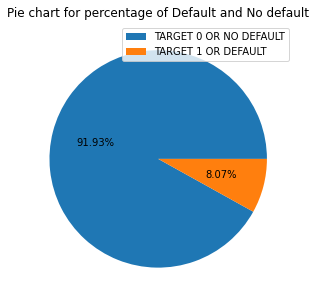

In [ ]:
'''This code cell gives us the percentage of loans where default has been observed and percentage of loan where no default has been observed'''

application_train_group = application_train[['SK_ID_CURR', 'TARGET']].fillna('MISSING')
category_count = (application_train_group.groupby(by = ['TARGET']).count()/application_train['TARGET'].count())*100
category_name = np.unique(application_train_group['TARGET'])
#Print a table of different categories and their count
print('Table of percentage of Default represented by 1 and no default represented by 0')
print('\033[1m' + "Category".ljust(30) + "Percentage".ljust(30) + '\033[0m')
for a, b in zip(list(category_name), np.array(category_count)): 
  print(str(a).ljust(30) + str('%.2f'%b).ljust(30))
pie_chart((5,5), category_count, ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 'Pie chart for percentage of Default and No default')

> An analysis of default indicates that 8.07% of applicants in application_train are defaulters. From a business perspective, this percentage needs to be reduced. From a machine learning perspective, the dataset is imbalanced.

## 3.2 Analysis based on family status

Table of count for diffent category
Category                      Count of Target 0/No Default       Count of Target 1/Default     
Civil marriage                26814                              2961                          
Married                       181582                             14850                         
Separated                     18150                              1620                          
Single / not married          40987                              4457                          
Unknown                       2                                  0                             
Widow                         15151                              937                           


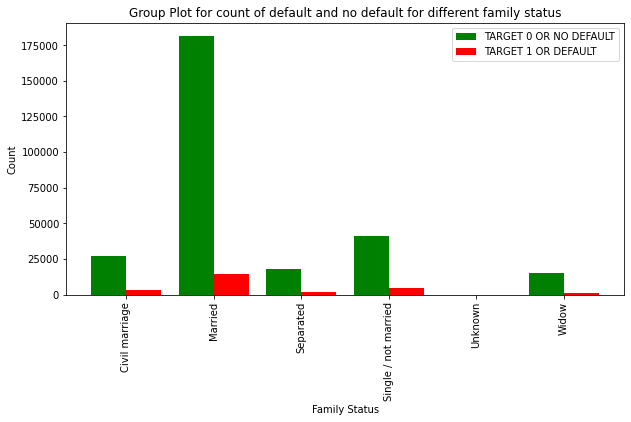

----------------------------------------------------------------------------------------------------
Table of percentage for diffent category
Category                      % of Target 0/No Default           % of Target 1/Default         
Civil marriage                90.06                              9.94                          
Married                       92.44                              7.56                          
Separated                     91.81                              8.19                          
Single / not married          90.19                              9.81                          
Unknown                       100.00                             0.00                          
Widow                         94.18                              5.82                          


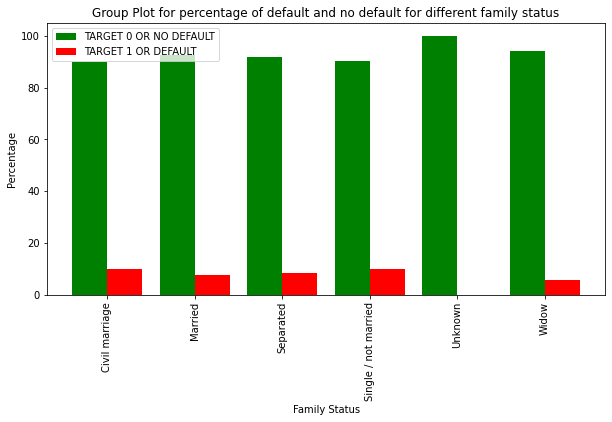

In [ ]:
'''This code cell does plots graph plot for distribution (count and percentage) of default 
and no default applicants with different family status'''

#Calculate different categories and their count
y_axis = application_train.pivot_table(index='NAME_FAMILY_STATUS', columns='TARGET', values='SK_ID_CURR', fill_value=0, aggfunc='count').unstack()
classes = np.unique(application_train['NAME_FAMILY_STATUS'])
#Print a table of different categories and their count
print('Table of count for diffent category')
print("Category".ljust(30) + "Count of Target 0/No Default".ljust(35) + "Count of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis[0]), list(y_axis[1])): 
  print(a.ljust(30) + str(b).ljust(35) + str(c).ljust(30))
#Call group_plot function to plot group plot
group_plot((10,5), y_axis[0], y_axis[1], classes, "Family Status", "Count", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for count of default and no default for different family status")

print("-"*100)

#Calculate percentage of different category
y_axis_0_percentage = [(y_axis[0][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
y_axis_1_percentage = [(y_axis[1][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
#Print a table of different categories and their percentage
print('Table of percentage for diffent category')
print('\033[1m' + "Category".ljust(30) + "% of Target 0/No Default".ljust(35) + "% of Target 1/Default".ljust(30) + '\033[0m')
for a, b, c in zip(classes, list(y_axis_0_percentage), list(y_axis_1_percentage)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(35) + str('%.2f'%c).ljust(30))
#Call group_plot function to plot group plot
group_plot((10,5), y_axis_0_percentage, y_axis_1_percentage, classes, "Family Status", "Percentage", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for percentage of default and no default for different family status")

Table of percentage of different family status
Category                      Percentage                    
Civil marriage                9.68                          
Married                       63.88                         
Separated                     6.43                          
Single / not married          14.78                         
Unknown                       0.00                          
Widow                         5.23                          


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


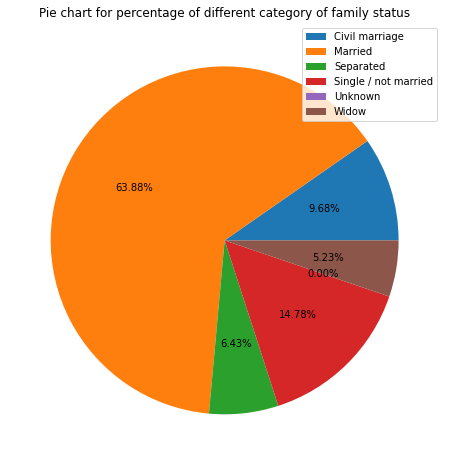

In [ ]:
'''In this code cell, pie chart is plotted for distribution of family status'''

application_train_group = application_train[['SK_ID_CURR', 'NAME_FAMILY_STATUS']].fillna('MISSING')
category_count = (application_train_group.groupby(by = ['NAME_FAMILY_STATUS']).count()/application_train['NAME_FAMILY_STATUS'].count())*100
category_name = np.unique(application_train_group['NAME_FAMILY_STATUS'])
print('Table of percentage of different family status')
print('\033[1m' + "Category".ljust(30) + "Percentage".ljust(30) + '\033[0m')
for a, b in zip(list(category_name), np.array(category_count)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(30))
pie_chart((8,8), category_count, category_name, 'Pie chart for percentage of different category of family status')

> An analysis of family status of applicants and default indicates that maximum applicants are married and percentage of default is lower among married people. From a business point of view, married people should be further targeted for loans.
Default among widows is also very low however, the percentage of widow applicants is low. This group can be targeted and further analysed till there is a substantial population in this group.
Civil marriage and Single / not married categories are where focus should be to reduce the percentage of defaulters. The loan process may put an extra check for these groups.

## 3.3 Analysis based on contract type

Table of count for diffent category
Category                      Count of Target 0/No Default       Count of Target 1/Default     
Cash loans                    255011                             23221                         
Revolving loans               27675                              1604                          


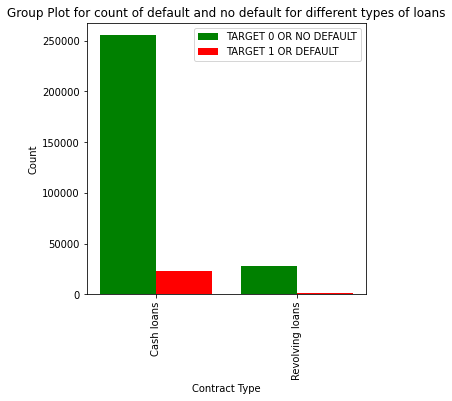

----------------------------------------------------------------------------------------------------
Table of percentage for diffent category
Category                      % of Target 0/No Default           % of Target 1/Default         
Cash loans                    91.65                              8.35                          
Revolving loans               94.52                              5.48                          


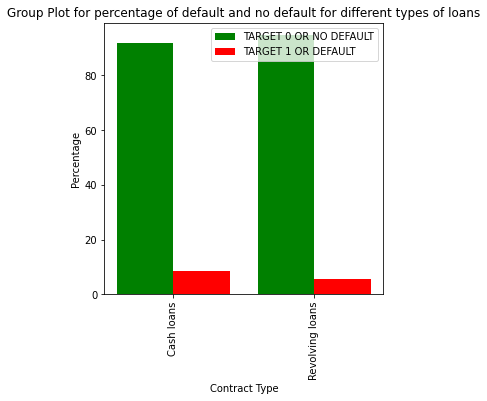

In [ ]:
'''This code cell does plots graph plot for distribution (count and percentage) of default 
and no default applicants with different contract type'''

#Calculate different categories and their count
y_axis = application_train.pivot_table(index='NAME_CONTRACT_TYPE', columns='TARGET', values='SK_ID_CURR', fill_value=0, aggfunc='count').unstack()
classes = np.unique(application_train['NAME_CONTRACT_TYPE'])
#Print a table of different categories and their count
print('Table of count for diffent category')
print('\033[1m' + "Category".ljust(30) + "Count of Target 0/No Default".ljust(35) + "Count of Target 1/Default".ljust(30) + '\033[0m')
for a, b, c in zip(classes, list(y_axis[0]), list(y_axis[1])): 
  print(a.ljust(30) + str(b).ljust(35) + str(c).ljust(30))
#Call group_plot function to plot group plot
group_plot((5,5), y_axis[0], y_axis[1], classes, "Contract Type", "Count", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for count of default and no default for different types of loans")

print('-'*100)

y_axis_0_percentage = [(y_axis[0][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
y_axis_1_percentage = [(y_axis[1][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
#Print a table of different categories and their percentage
print('Table of percentage for diffent category')
print('\033[1m' + "Category".ljust(30) + "% of Target 0/No Default".ljust(35) + "% of Target 1/Default".ljust(30) + '\033[0m')
for a, b, c in zip(classes, list(y_axis_0_percentage), list(y_axis_1_percentage)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(35) + str('%.2f'%c).ljust(30))
#Call group_plot function to plot group plot
group_plot((5,5), y_axis_0_percentage, y_axis_1_percentage, classes, "Contract Type", "Percentage", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for percentage of default and no default for different types of loans")

Table of percentage of different types of loan
Category                      Percentage                    
Cash loans                    90.48                         
Revolving loans               9.52                          


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


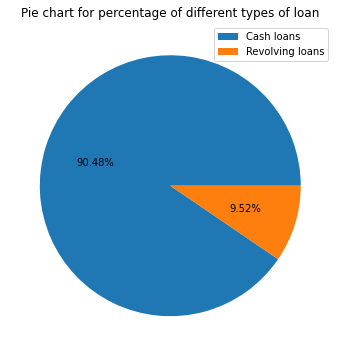

In [ ]:
'''In this code cell, pie chart is plotted for distribution of loan types'''

application_train_group = application_train[['SK_ID_CURR', 'NAME_CONTRACT_TYPE']].fillna('MISSING')
category_count = (application_train_group.groupby(by = ['NAME_CONTRACT_TYPE']).count()/application_train['NAME_CONTRACT_TYPE'].count())*100
category_name = np.unique(application_train_group['NAME_CONTRACT_TYPE'])
print('Table of percentage of different types of loan')
print('\033[1m' + "Category".ljust(30) + "Percentage".ljust(30) + '\033[0m')
for a, b in zip(list(category_name), np.array(category_count)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(30))
pie_chart((6,6), category_count, category_name, 'Pie chart for percentage of different types of loan')

> An analysis of the type of loans and default indicates that the percentage of cash loans is much higher than revolving loans. The percentage of default is lower in case of revolving loans. Thrust should be laid on disbursing revolving loans, which generally have variable rates of interest.

## 3.4 Analysis based on gender

Table of count for diffent category
Category                      Count of Target 0/No Default       Count of Target 1/Default     
F                             188278                             14170                         
M                             94404                              10655                         
XNA                           4                                  0                             


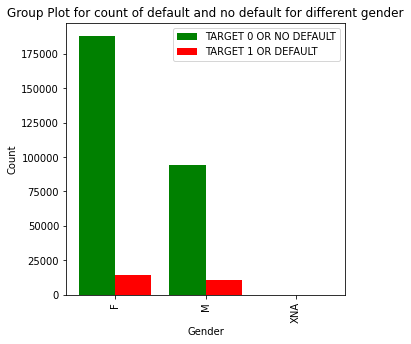

----------------------------------------------------------------------------------------------------
Table of percentage for diffent category
Category                      % of Target 0/No Default           % of Target 1/Default         
F                             93.00                              7.00                          
M                             89.86                              10.14                         
XNA                           100.00                             0.00                          


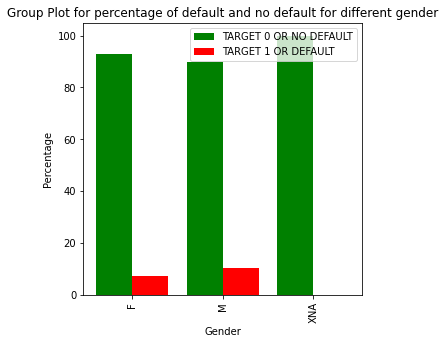

In [ ]:
'''This code cell does plots graph plot for distribution (count and percentage) of default 
and no default applicants for diggerent gender.'''

#Calculate different categories and their count
y_axis = application_train.pivot_table(index='CODE_GENDER', columns='TARGET', values='SK_ID_CURR', fill_value=0, aggfunc='count').unstack()
classes = np.unique(application_train['CODE_GENDER'])
#Print a table of different categories and their count
print('Table of count for diffent category')
print("Category".ljust(30) + "Count of Target 0/No Default".ljust(35) + "Count of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis[0]), list(y_axis[1])): 
  print(a.ljust(30) + str(b).ljust(35) + str(c).ljust(30))
#Call group_plot function to plot group plot
group_plot((5,5), y_axis[0], y_axis[1], classes, "Gender", "Count", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for count of default and no default for different gender")

print('-'*100)

#Calculate percentage of different category
y_axis_0_percentage = [(y_axis[0][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
y_axis_1_percentage = [(y_axis[1][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
#Print a table of different categories and their percentage
print('Table of percentage for diffent category')
print('\033[1m' + "Category".ljust(30) + "% of Target 0/No Default".ljust(35) + "% of Target 1/Default".ljust(30) + '\033[0m')
for a, b, c in zip(classes, list(y_axis_0_percentage), list(y_axis_1_percentage)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(35) + str('%.2f'%c).ljust(30))
#Call group_plot function to plot group plot
group_plot((5,5), y_axis_0_percentage, y_axis_1_percentage, classes, "Gender", "Percentage", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for percentage of default and no default for different gender")

Table of percentage of different gender
Category                      Percentage                    
F                             65.83                         
M                             34.16                         
XNA                           0.00                          


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


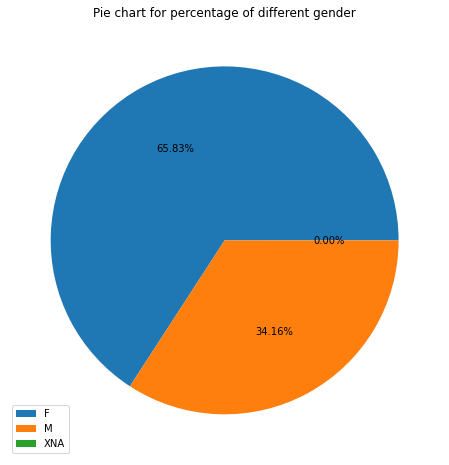

In [ ]:
'''In this code cell, pie chart is plotted for distribution of gender'''

application_train_group = application_train[['SK_ID_CURR', 'CODE_GENDER']].fillna('MISSING')
category_count = (application_train_group.groupby(by = ['CODE_GENDER']).count()/application_train['CODE_GENDER'].count())*100
category_name = np.unique(application_train_group['CODE_GENDER'])
print('Table of percentage of different gender')
print("Category".ljust(30) + "Percentage".ljust(30))
for a, b in zip(list(category_name), np.array(category_count)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(30))
pie_chart((8,8), category_count, category_name, 'Pie chart for percentage of different gender')

> An analysis based on gender and default indicates that the number of male applicants is double the number of female applicants. This result also has a social connotation apart from business impact. It can be concluded that more number of male are earning compared to females and a gender disparity exists. Policy makers will have the responsibility to remove this disparity or evaluate their steps taken earlier.
As the percentage of female defaulters is lesser than male defaulters, this calls for promotion of loan among females.
From this preliminary analysis, it seems that gender is an important parameter. However, the decision to retain or remove this parameter shall be taken after mathematical analysis of data in the feature selection section.

## 3.5 Analysis based on income

In [ ]:
'''In this code cell, data under column titled AMT_INCOME_TOTAL is grouped into 10 bins based 
upon 10 quantitle. A new column - income_bins - is created in application_train which indicates 
respective bins for entries in AMT_INCOME_TOTAL'''

application_train['income_bins'] = pd.qcut(application_train['AMT_INCOME_TOTAL'], q=10)

Table of count for diffent category
Category                      Count of Target 0/No Default       Count of Target 1/Default     
(25649.999, 81000.0]          30656                              2735                          
(81000.0, 99000.0]            27790                              2490                          
(99000.0, 112500.0]           33689                              3218                          
(112500.0, 135000.0]          44702                              4147                          
(135000.0, 147150.0]          3943                               390                           
(147150.0, 162000.0]          28431                              2689                          
(162000.0, 180000.0]          28118                              2586                          
(180000.0, 225000.0]          41311                              3498                          
(225000.0, 270000.0]          18552                              1405                          
(270

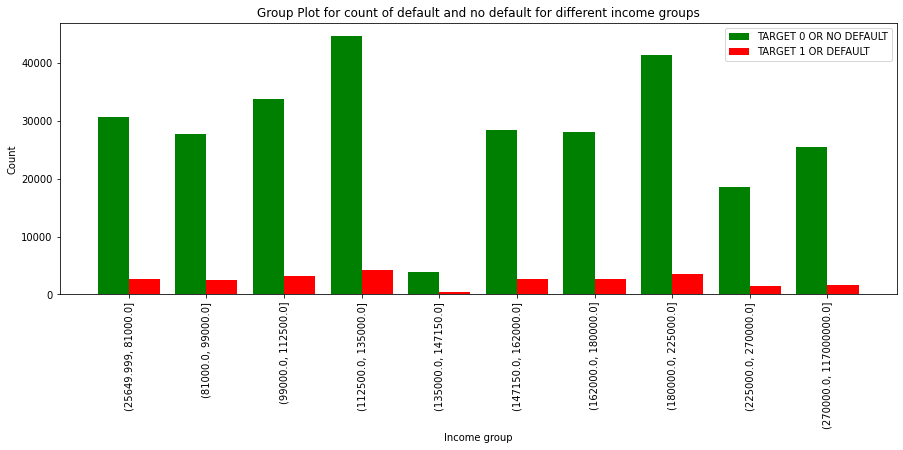

----------------------------------------------------------------------------------------------------
Table of percentage for diffent category
Category                      % of Target 0/No Default           % of Target 1/Default         
(25649.999, 81000.0]          91.81                              8.19                          
(81000.0, 99000.0]            91.78                              8.22                          
(99000.0, 112500.0]           91.28                              8.72                          
(112500.0, 135000.0]          91.51                              8.49                          
(135000.0, 147150.0]          91.00                              9.00                          
(147150.0, 162000.0]          91.36                              8.64                          
(162000.0, 180000.0]          91.58                              8.42                          
(180000.0, 225000.0]          92.19                              7.81                     

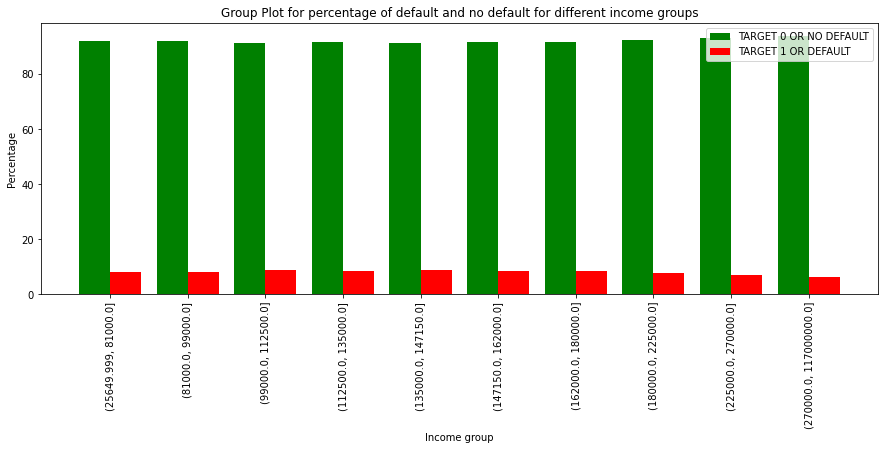

In [ ]:
'''This code cell does plots graph plot for distribution (count and percentage) of default 
and no default applicants with different income groups.'''

#Calculate different categories and their count
y_axis = application_train.pivot_table(index='income_bins', columns='TARGET', values='SK_ID_CURR', fill_value=0, aggfunc='count').unstack()
classes = np.unique(application_train['income_bins'])
#Print a table of different categories and their count
print('Table of count for diffent category')
print("Category".ljust(30) + "Count of Target 0/No Default".ljust(35) + "Count of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis[0]), list(y_axis[1])): 
  print(str(a).ljust(30) + str(b).ljust(35) + str(c).ljust(30))
#Call group_plot function to plot group plot
group_plot((15,5), y_axis[0], y_axis[1], classes, "Income group", "Count", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for count of default and no default for different income groups")

print('-'*100)

#Calculate percentage of different category
y_axis_0_percentage = [(y_axis[0][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
y_axis_1_percentage = [(y_axis[1][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
#Print a table of different categories and their percentage
print('Table of percentage for diffent category')
print("Category".ljust(30) + "% of Target 0/No Default".ljust(35) + "% of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis_0_percentage), list(y_axis_1_percentage)): 
  print(str(a).ljust(30) + str('%.2f'%b).ljust(35) + str('%.2f'%c).ljust(30))
#Call group_plot function to plot group plot
group_plot((15,5), y_axis_0_percentage, y_axis_1_percentage, classes, "Income group", "Percentage", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for percentage of default and no default for different income groups")

Table of percentage of different income groups
Category                      Percentage                    
(25649.999, 81000.0]          10.86                         
(81000.0, 99000.0]            9.85                          
(99000.0, 112500.0]           12.00                         
(112500.0, 135000.0]          15.89                         
(135000.0, 147150.0]          1.41                          
(147150.0, 162000.0]          10.12                         
(162000.0, 180000.0]          9.98                          
(180000.0, 225000.0]          14.57                         
(225000.0, 270000.0]          6.49                          
(270000.0, 117000000.0]       8.83                          


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


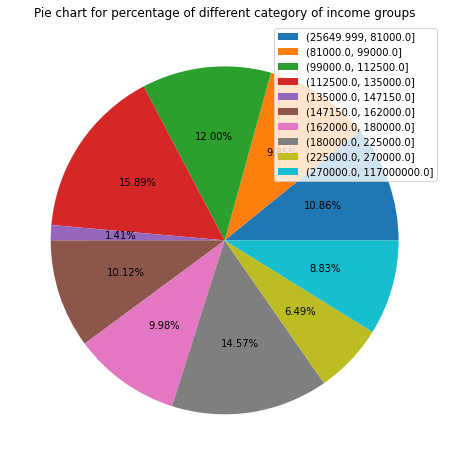

In [ ]:
'''In this code cell, pie chart is plotted for distribution of income groups'''

application_train_group = application_train[['SK_ID_CURR', 'income_bins']]
category_count = (application_train_group.groupby(by = ['income_bins']).count()/application_train['income_bins'].count())*100
category_name = np.unique(application_train_group['income_bins'])
print('Table of percentage of different income groups')
print("Category".ljust(30) + "Percentage".ljust(30))
for a, b in zip(list(category_name), np.array(category_count)): 
  print(str(a).ljust(30) + str('%.2f'%b).ljust(30))
pie_chart((8,8), category_count, category_name, 'Pie chart for percentage of different category of income groups')

> There is not much significant disparity among different income groups except for 135000.0-147150.0 where loan applicants are very low. 
Loan applicants are more in lower income groups compared to higher income groups. Loan defaulters are also leeser in higher income groups compared to lower income groups. 
Two particular income groups with higher percentage of applicants are 112500.0-135000.0 and 180000.0-225000.0. This data also indicates a few inordinately high income applicants. These data points may be outliers which will be dealt separately in the outlier detection and removal section.

## 3.6 Analysis based on income type

Table of count for diffent category
Category                      Count of Target 0/No Default       Count of Target 1/Default     
Businessman                   10                                 0                             
Commercial associate          66257                              5360                          
Maternity leave               3                                  2                             
Pensioner                     52380                              2982                          
State servant                 20454                              1249                          
Student                       18                                 0                             
Unemployed                    14                                 8                             
Working                       143550                             15224                         


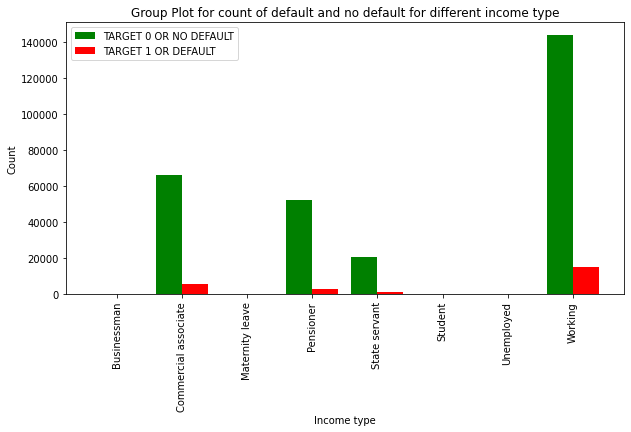

----------------------------------------------------------------------------------------------------
Table of percentage for diffent category
Category                      % of Target 0/No Default           % of Target 1/Default         
Businessman                   100.00                             0.00                          
Commercial associate          92.52                              7.48                          
Maternity leave               60.00                              40.00                         
Pensioner                     94.61                              5.39                          
State servant                 94.25                              5.75                          
Student                       100.00                             0.00                          
Unemployed                    63.64                              36.36                         
Working                       90.41                              9.59                     

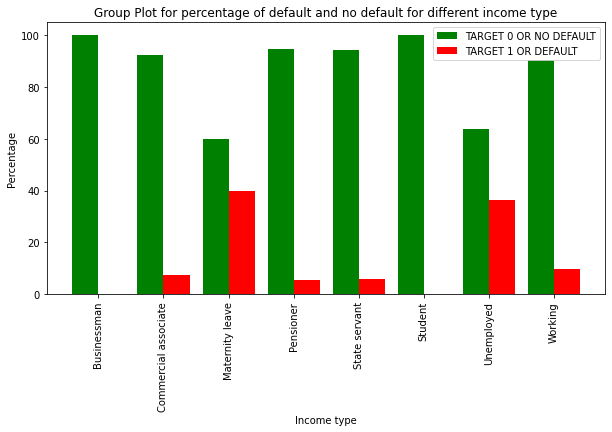

In [ ]:
'''This code cell does plots graph plot for distribution (count and percentage) of default 
and no default applicants with different income type'''

#Calculate different categories and their count
y_axis = application_train.pivot_table(index='NAME_INCOME_TYPE', columns='TARGET', values='SK_ID_CURR', fill_value=0, aggfunc='count').unstack()
classes = np.unique(application_train['NAME_INCOME_TYPE'])
#Print a table of different categories and their count
print('Table of count for diffent category')
print("Category".ljust(30) + "Count of Target 0/No Default".ljust(35) + "Count of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis[0]), list(y_axis[1])): 
  print(a.ljust(30) + str(b).ljust(35) + str(c).ljust(30))
#Call group_plot function to plot group plot
group_plot((10,5), y_axis[0], y_axis[1], classes, "Income type", "Count", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for count of default and no default for different income type")

print("-"*100)

#Calculate percentage of different category
y_axis_0_percentage = [(y_axis[0][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
y_axis_1_percentage = [(y_axis[1][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
#Print a table of different categories and their percentage
print('Table of percentage for diffent category')
print("Category".ljust(30) + "% of Target 0/No Default".ljust(35) + "% of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis_0_percentage), list(y_axis_1_percentage)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(35) + str('%.2f'%c).ljust(30))
#Call group_plot function to plot group plot
group_plot((10,5), y_axis_0_percentage, y_axis_1_percentage, classes, "Income type", "Percentage", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for percentage of default and no default for different income type")

Table of percentage of different income type
Category                      Percentage                    
Businessman                   0.00                          
Commercial associate          23.29                         
Maternity leave               0.00                          
Pensioner                     18.00                         
State servant                 7.06                          
Student                       0.01                          
Unemployed                    0.01                          
Working                       51.63                         


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


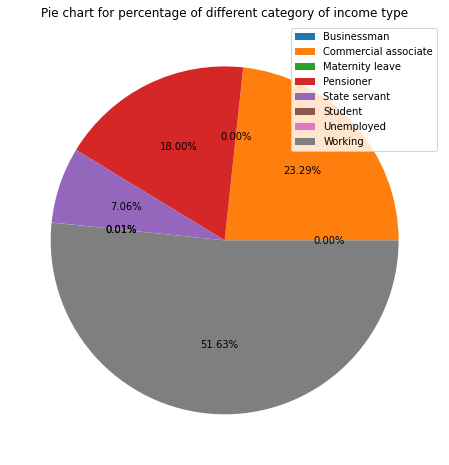

In [ ]:
'''In this code cell, pie chart is plotted for distribution of income type'''

application_train_group = application_train[['SK_ID_CURR', 'NAME_INCOME_TYPE']].fillna('MISSING')
category_count = (application_train_group.groupby(by = ['NAME_INCOME_TYPE']).count()/application_train['NAME_INCOME_TYPE'].count())*100
category_name = np.unique(application_train_group['NAME_INCOME_TYPE'])
print('Table of percentage of different income type')
print("Category".ljust(30) + "Percentage".ljust(30))
for a, b in zip(list(category_name), np.array(category_count)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(30))
pie_chart((8,8), category_count, category_name, 'Pie chart for percentage of different category of income type')

> An analysis based on income type indicates huge disparity among the groups with different income types. 
The default rate is very low among pensioners and government servants. They become a target group for promotion of loans and further evaluation of results. Groups with lower numbers of applicants can be targeted for loans and results shall be evaluated after some time.
From this preliminary analysis, it seems that income type is an important parameter. However, the decision to retain or remove this parameter shall be taken after mathematical analysis of data in the feature selection section.

## 3.7 Analysis based on education type

Table of count for diffent category
Category                      Count of Target 0/No Default       Count of Target 1/Default     
Academic degree               161                                3                             
Higher education              70854                              4009                          
Incomplete higher             9405                               872                           
Lower secondary               3399                               417                           
Secondary / secondary special 198867                             19524                         


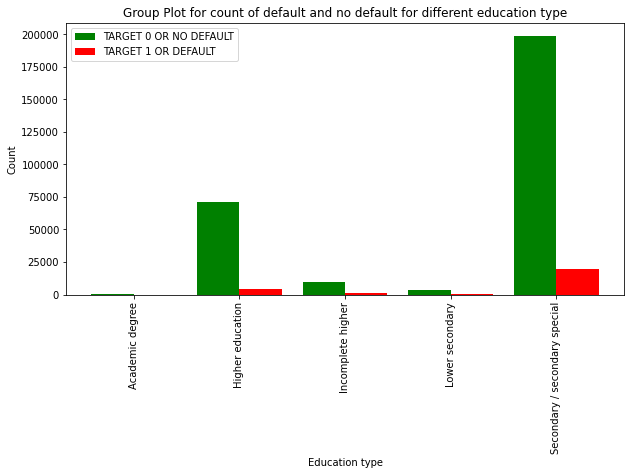

----------------------------------------------------------------------------------------------------
Table of percentage for diffent category
Category                      % of Target 0/No Default           % of Target 1/Default         
Academic degree               98.17                              1.83                          
Higher education              94.64                              5.36                          
Incomplete higher             91.52                              8.48                          
Lower secondary               89.07                              10.93                         
Secondary / secondary special 91.06                              8.94                          


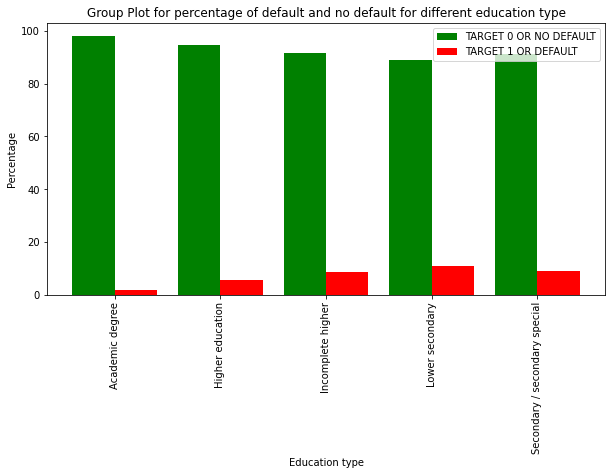

In [ ]:
'''This code cell does plots graph plot for distribution (count and percentage) of default 
and no default applicants with different education type'''

#Calculate different categories and their count
y_axis = application_train.pivot_table(index='NAME_EDUCATION_TYPE', columns='TARGET', values='SK_ID_CURR', fill_value=0, aggfunc='count').unstack()
classes = np.unique(application_train['NAME_EDUCATION_TYPE'])
#Print a table of different categories and their count
print('Table of count for diffent category')
print("Category".ljust(30) + "Count of Target 0/No Default".ljust(35) + "Count of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis[0]), list(y_axis[1])): 
  print(a.ljust(30) + str(b).ljust(35) + str(c).ljust(30))
#Call group_plot function to plot group plot
group_plot((10,5), y_axis[0], y_axis[1], classes, "Education type", "Count", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for count of default and no default for different education type")

print("-"*100)

#Print a table of different categories and their percentage
y_axis_0_percentage = [(y_axis[0][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
y_axis_1_percentage = [(y_axis[1][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
#Print a table of different categories and their percentage
print('Table of percentage for diffent category')
print("Category".ljust(30) + "% of Target 0/No Default".ljust(35) + "% of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis_0_percentage), list(y_axis_1_percentage)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(35) + str('%.2f'%c).ljust(30))
#Call group_plot function to plot group plot
group_plot((10,5), y_axis_0_percentage, y_axis_1_percentage, classes, "Education type", "Percentage", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for percentage of default and no default for different education type")

Table of percentage of different education type
Category                      Percentage                    
Academic degree               0.05                          
Higher education              24.34                         
Incomplete higher             3.34                          
Lower secondary               1.24                          
Secondary / secondary special 71.02                         


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


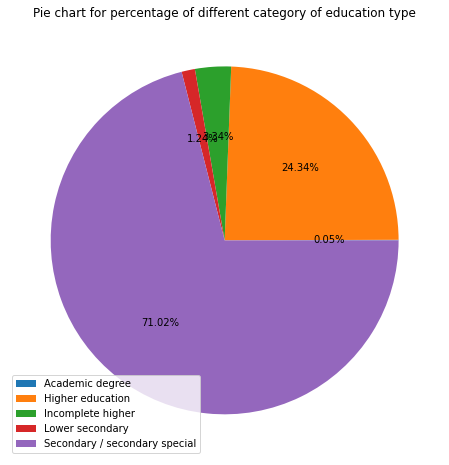

In [ ]:
'''In this code cell, pie chart is plotted for distribution of education type'''

application_train_group = application_train[['SK_ID_CURR', 'NAME_EDUCATION_TYPE']].fillna('MISSING')
category_count = (application_train_group.groupby(by = ['NAME_EDUCATION_TYPE']).count()/application_train['NAME_EDUCATION_TYPE'].count())*100
category_name = np.unique(application_train_group['NAME_EDUCATION_TYPE'])
print('Table of percentage of different education type')
print("Category".ljust(30) + "Percentage".ljust(30))
for a, b in zip(list(category_name), np.array(category_count)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(30))
pie_chart((8,8), category_count, category_name, 'Pie chart for percentage of different category of education type')

> An analysis based on education type indicates huge disparity among the groups with different education types. 
It is observed that as the level of education increases, the percentage of default decreases. Education is in general correlated to income. Hence, this observation suggests that groups with higher levels of education should be targeted for loans.
From this preliminary analysis, it seems that education is an important parameter. However, the decision to retain or remove this parameter shall be taken after mathematical analysis of data in the feature selection section.


## 3.8 Analysis based on occupation type

Table of count for diffent category
Category                      Count of Target 0/No Default       Count of Target 1/Default     
Accountants                   9339                               474                           
Cleaning staff                4206                               447                           
Cooking staff                 5325                               621                           
Core staff                    25832                              1738                          
Drivers                       16496                              2107                          
HR staff                      527                                36                            
High skill tech staff         10679                              701                           
IT staff                      492                                34                            
Laborers                      49348                              5838                          
Low-

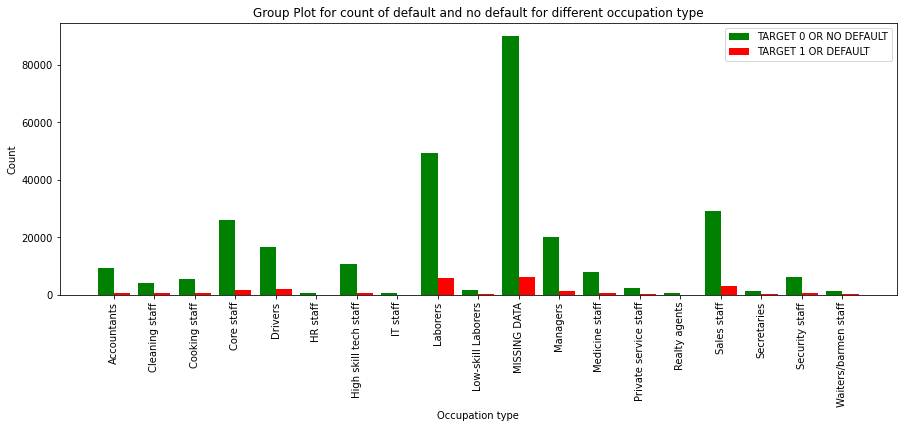

----------------------------------------------------------------------------------------------------
Table of percentage for diffent category
Category                      % of Target 0/No Default           % of Target 1/Default         
Accountants                   95.17                              4.83                          
Cleaning staff                90.39                              9.61                          
Cooking staff                 89.56                              10.44                         
Core staff                    93.70                              6.30                          
Drivers                       88.67                              11.33                         
HR staff                      93.61                              6.39                          
High skill tech staff         93.84                              6.16                          
IT staff                      93.54                              6.46                     

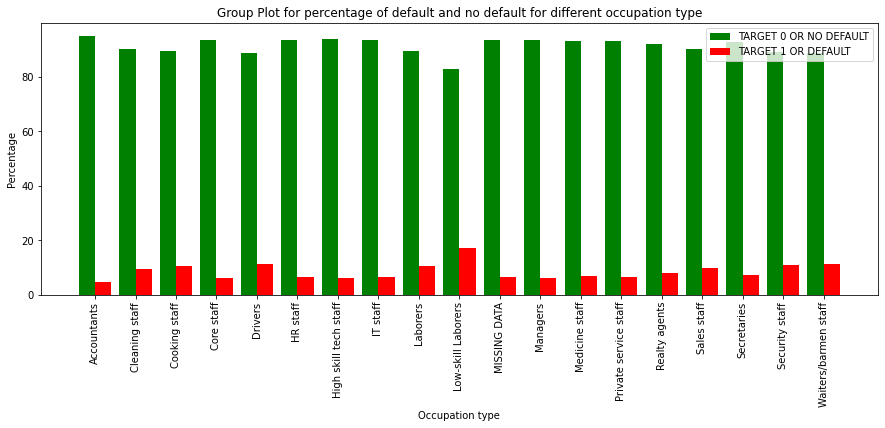

In [ ]:
'''This code cell does plots graph plot for distribution (count and percentage) of default 
and no default applicants with different occupation type'''

#Calculate different categories and their count
df = application_train[['SK_ID_CURR', 'TARGET', 'OCCUPATION_TYPE']].fillna('MISSING DATA')
y_axis = df.pivot_table(index='OCCUPATION_TYPE', columns='TARGET', values='SK_ID_CURR', fill_value=0, aggfunc='count').unstack()
classes = np.unique(df['OCCUPATION_TYPE'])
#Print a table of different categories and their count
print('Table of count for diffent category')
print("Category".ljust(30) + "Count of Target 0/No Default".ljust(35) + "Count of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis[0]), list(y_axis[1])): 
  print(a.ljust(30) + str(b).ljust(35) + str(c).ljust(30))
#Call group_plot function to plot group plot
group_plot((15,5), y_axis[0], y_axis[1], classes, "Occupation type", "Count", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for count of default and no default for different occupation type")

print("-"*100)

#Calculate percentage of different category
y_axis_0_percentage = [(y_axis[0][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
y_axis_1_percentage = [(y_axis[1][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
#Print a table of different categories and their percentage
print('Table of percentage for diffent category')
print("Category".ljust(30) + "% of Target 0/No Default".ljust(35) + "% of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis_0_percentage), list(y_axis_1_percentage)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(35) + str('%.2f'%c).ljust(30))
#Call group_plot function to plot group plot
group_plot((15,5), y_axis_0_percentage, y_axis_1_percentage, classes, "Occupation type", "Percentage", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for percentage of default and no default for different occupation type")

Table of percentage of different occupation type
Category                      Percentage                    
Accountants                   3.19                          
Cleaning staff                1.51                          
Cooking staff                 1.93                          
Core staff                    8.97                          
Drivers                       6.05                          
HR staff                      0.18                          
High skill tech staff         3.70                          
IT staff                      0.17                          
Laborers                      17.95                         
Low-skill Laborers            0.68                          
MISSING DATA                  31.35                         
Managers                      6.95                          
Medicine staff                2.78                          
Private service staff         0.86                          
Realty agents                 0.24  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


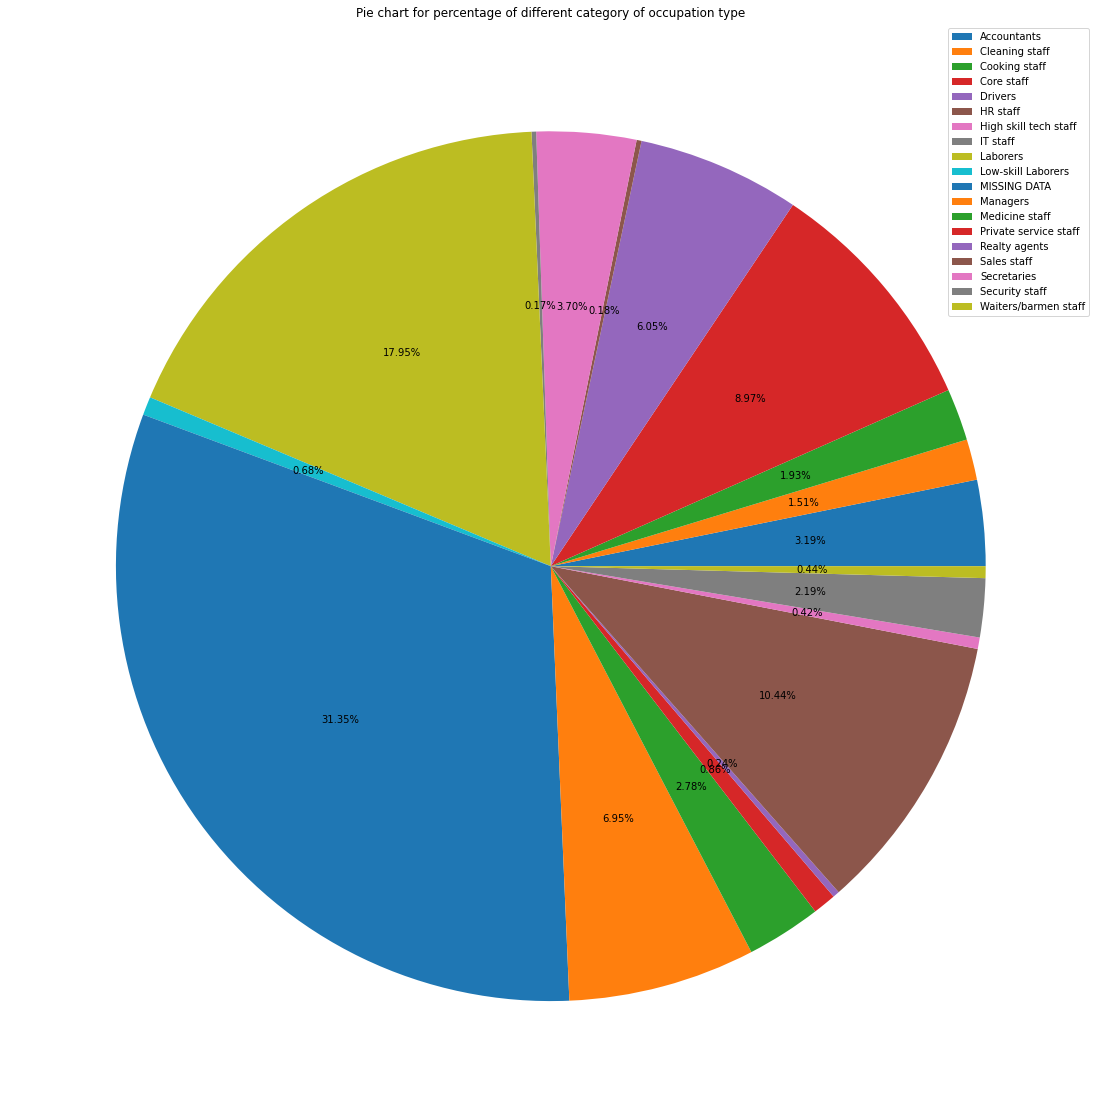

In [ ]:
'''In this code cell, pie chart is plotted for distribution of occupation type'''

application_train_group = application_train[['SK_ID_CURR', 'OCCUPATION_TYPE']].fillna('MISSING DATA')
category_count = (application_train_group.groupby(by = ['OCCUPATION_TYPE']).count()/application_train['NAME_EDUCATION_TYPE'].count())*100
category_name = np.unique(application_train_group['OCCUPATION_TYPE'])
print('Table of percentage of different occupation type')
print("Category".ljust(30) + "Percentage".ljust(30))
for a, b in zip(list(category_name), np.array(category_count)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(30))
pie_chart((20,20), category_count, category_name, 'Pie chart for percentage of different category of occupation type')

> 31.35% data is missing in case of occupation type. Among the available data, labourers constitute the highest percentage of defaulters.
Groups with low percentage of default e.g., Accountants, Core staff, HR staff, High skill tech staff, IT staff etc., should be targeted for disbursing loans.
Accountants have the lowest percentage of default and also low percentage of application. They form an important target group.
From this preliminary analysis, it seems that occupation type is an important parameter. However, the decision to retain or remove this parameter shall be taken after mathematical analysis of data in the feature selection section.


## 3.9 Analysis based on day of the week

Table of count for diffent category
Category                      Count of Target 0/No Default       Count of Target 1/Default     
FRIDAY                        46237                              4101                          
MONDAY                        46780                              3934                          
SATURDAY                      31182                              2670                          
SUNDAY                        14898                              1283                          
THURSDAY                      46493                              4098                          
TUESDAY                       49400                              4501                          
WEDNESDAY                     47696                              4238                          


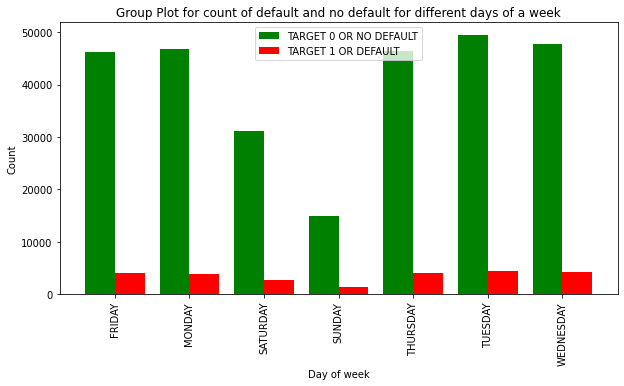

----------------------------------------------------------------------------------------------------
Table of percentage for diffent category
Category                      % of Target 0/No Default           % of Target 1/Default         
FRIDAY                        91.85                              8.15                          
MONDAY                        92.24                              7.76                          
SATURDAY                      92.11                              7.89                          
SUNDAY                        92.07                              7.93                          
THURSDAY                      91.90                              8.10                          
TUESDAY                       91.65                              8.35                          
WEDNESDAY                     91.84                              8.16                          


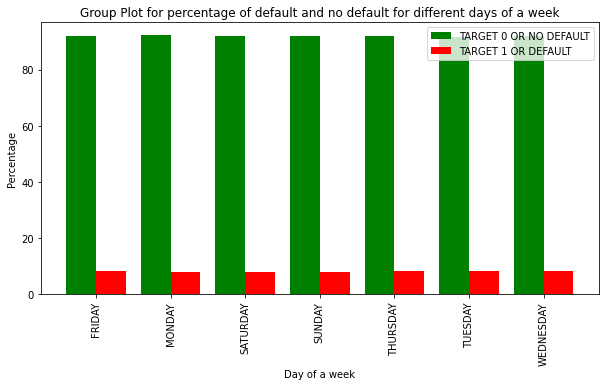

In [ ]:
'''This code cell does plots graph plot for distribution (count and percentage) of default 
and no default applicants based on day of application'''

#Calculate different categories and their count
y_axis = application_train.pivot_table(index='WEEKDAY_APPR_PROCESS_START', columns='TARGET', values='SK_ID_CURR', fill_value=0, aggfunc='count').unstack()
classes = np.unique(application_train['WEEKDAY_APPR_PROCESS_START'])
#Print a table of different categories and their count
print('Table of count for diffent category')
print("Category".ljust(30) + "Count of Target 0/No Default".ljust(35) + "Count of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis[0]), list(y_axis[1])): 
  print(a.ljust(30) + str(b).ljust(35) + str(c).ljust(30))
#Call group_plot function to plot group plot
group_plot((10,5), y_axis[0], y_axis[1], classes, "Day of week", "Count", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for count of default and no default for different days of a week")

print("-"*100)

#Calculate percentage of different category
y_axis_0_percentage = [(y_axis[0][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
y_axis_1_percentage = [(y_axis[1][i]/(y_axis[0][i] + y_axis[1][i]))*100 for i in range(len(y_axis[0]))]
#Print a table of different categories and their percentage
print('Table of percentage for diffent category')
print("Category".ljust(30) + "% of Target 0/No Default".ljust(35) + "% of Target 1/Default".ljust(30))
for a, b, c in zip(classes, list(y_axis_0_percentage), list(y_axis_1_percentage)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(35) + str('%.2f'%c).ljust(30))
#Call group_plot function to plot group plot
group_plot((10,5), y_axis_0_percentage, y_axis_1_percentage, classes, "Day of a week", "Percentage", ["TARGET 0 OR NO DEFAULT", "TARGET 1 OR DEFAULT"], 
           "Group Plot for percentage of default and no default for different days of a week")

Table of percentage of different days of a week
Category                      Percentage                    
FRIDAY                        50338.00                      
MONDAY                        50714.00                      
SATURDAY                      33852.00                      
SUNDAY                        16181.00                      
THURSDAY                      50591.00                      
TUESDAY                       53901.00                      
WEDNESDAY                     51934.00                      


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


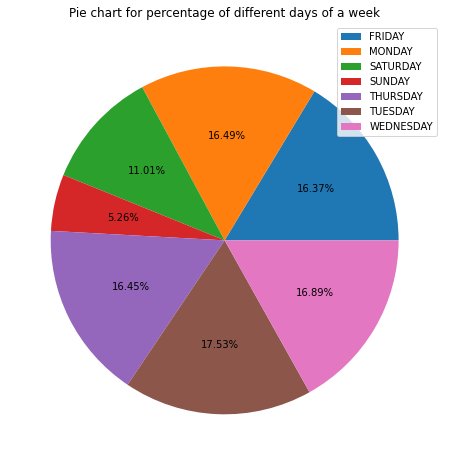

In [ ]:
'''In this code cell, pie chart is plotted for distribution of occupation type type'''

application_train_group = application_train[['SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START']].fillna('MISSING')
category_count = (application_train_group.groupby(by = ['WEEKDAY_APPR_PROCESS_START']).count())
category_name = np.unique(application_train_group['WEEKDAY_APPR_PROCESS_START'])
print('Table of percentage of different days of a week')
print("Category".ljust(30) + "Percentage".ljust(30))
for a, b in zip(list(category_name), np.array(category_count)): 
  print(a.ljust(30) + str('%.2f'%b).ljust(30))
pie_chart((8,8), category_count, category_name, 'Pie chart for percentage of different days of a week')

> An analysis based on day of the week indicates, most loan applications are done on weekdays. Number of loan applications decreases on Saturday and becomes very less on Sunday.
This data is very useful for staff management as more staff is required on weekdays compared to weekends.

# 4.0 Feature Engineering
Based upon the domain study in Phase-1 of this project, the following features shall be added to the list of parameters after importing relevant data:
* Create 3 new ratio:
1. Debt-to-Income Ratio - This is the ratio of loan annuity 
(AMT_ANNUITY) and income (AMT_INCOME_TOTAL) of the applicants.
2. Loan-to-Value Ratio - This is the ratio of loan amount (AMT_CREDIT) and price of the goods for which loan is given (AMT_GOODS_PRICE) to the applicants.
3. Loan-to-Income Ratio - This is the ratio of loan amount (AMT_CREDIT) and income (AMT_INCOME_TOTAL) of the applicants.
* Features shall be added to application_train and application_test from bureau.
* Features shall be added to application_train and application_test from previous_application.

## 4.1 Import data

In [ ]:
'''In this code cell data from all the csv files are imported'''

#Read application_train
application_train = dataframe_optimizer(pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/application_train.csv'))

#Read application_test
application_test = dataframe_optimizer(pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/application_test.csv'))

#Read bureau
bureau = dataframe_optimizer(pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/bureau.csv'))

#Read bureau_balance
bureau_balance = dataframe_optimizer(pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/bureau_balance.csv'))

#Read previous_application
previous_application = dataframe_optimizer(pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/previous_application.csv'))

#Read installments_payments
#installments_payments = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/installments_payments.csv')

#Read POS_CASH_balance
#POS_CASH_balance = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/POS_CASH_balance.csv')

#Read credit_card_balance
#credit_card_balance = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/credit_card_balance.csv')

## 4.2 Create 3 new ratios from existing columns of application_train and application_test

In [ ]:
'''In this code cell, 3 new columns/parameters are being added to application_train and application_test'''

#Add columns titled DEBT_INCOME_RATIO to application_train
application_train['DEBT_INCOME_RATIO'] = application_train['AMT_ANNUITY']/application_train['AMT_INCOME_TOTAL']

#Add columns titled LOAN_VALUE_RATIO to application_train
application_train['LOAN_VALUE_RATIO'] = application_train['AMT_CREDIT']/application_train['AMT_GOODS_PRICE']

#Add columns titled LOAN_INCOME_RATIO to application_train
application_train['LOAN_INCOME_RATIO'] = application_train['AMT_CREDIT']/application_train['AMT_INCOME_TOTAL']

#Add columns titled DEBT_INCOME_RATIO to application_test
application_test['DEBT_INCOME_RATIO'] = application_test['AMT_ANNUITY']/application_test['AMT_INCOME_TOTAL']

#Add columns titled LOAN_VALUE_RATIO to application_test
application_test['LOAN_VALUE_RATIO'] = application_test['AMT_CREDIT']/application_test['AMT_GOODS_PRICE']

#Add columns titled LOAN_INCOME_RATIO to application_test
application_test['LOAN_INCOME_RATIO'] = application_test['AMT_CREDIT']/application_test['AMT_INCOME_TOTAL']

In [ ]:
'''In this code cell columns with numerical and categorical features are put in separate lists'''

numerical_column = list(application_train.drop(columns = ['SK_ID_CURR', 'TARGET']).select_dtypes(exclude=object).columns)
categorical_column = list(application_train.drop(columns = ['TARGET']).select_dtypes(include=object).columns)
print(numerical_column)
print(categorical_column)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAR

## 4.3 Merge bureau with application_train and application_test

In [ ]:
'''In this code cell columns common among application (application_train/application_test) 
and bureau are found'''

#Find common column between application and bureau and print
bureau_common = set(set(application_train.columns) & set(bureau.columns))
print(bureau_common)

{'SK_ID_CURR', 'AMT_ANNUITY'}


In [ ]:
'''In this code cell common columns are renamed in bureau and put in a dictionary'''

#Rename columns common in bureau except SK_ID_CURR as merge will be performed on SK_ID_CURR
bureau.rename(columns={"AMT_ANNUITY": "AMT_ANNUITY_BUREAU"}, inplace = True)
#Save the renamed column in a dictionary for future reference
bureau_renamed = {"AMT_ANNUITY": "AMT_ANNUITY_BUREAU"}
#Create a dataframe with numerical columns of bureau
bureau_numerical = bureau.select_dtypes(exclude=object)
#Create a dataframe with categorical columns of bureau
bureau_categorical = bureau.select_dtypes(include=object)

In [ ]:
'''In this code cell numerical columns of bureau are merged with application_train'''

#Merge numerical features from bureau to application_train
bureau_numerical_merge = bureau_numerical.groupby(by=['SK_ID_CURR']).mean().reset_index()
application_train_1 = application_train.merge(bureau_numerical_merge, on='SK_ID_CURR', how='left', suffixes=('__left', ))
application_train_1.columns = application_train_1.columns.str.replace('__left', '')

#Merge categorical features from bureau to application_train
bureau_categorical_merge = pd.get_dummies(bureau_categorical)
bureau_categorical_merge['SK_ID_CURR'] = bureau['SK_ID_CURR']
bureau_categorical_merge = bureau_categorical_merge.groupby(by = ['SK_ID_CURR']).median()
application_train_1 = application_train_1.merge(bureau_categorical_merge, on='SK_ID_CURR', how='left')
application_train_1.update(application_train_1[bureau_categorical_merge.columns].fillna(0))
application_train_1.columns = application_train_1.columns.str.replace('__left', '')

#Drop SK_ID_BUREAU
application_train_1 = application_train_1.drop(columns = ['SK_ID_BUREAU'])

#Shape of application and bureau data combined
print('The shape of application_train and bureau data merged: ', application_train_1.shape)

The shape of application_train and bureau data merged:  (307511, 160)


In [ ]:
'''In this code cell numerical columns of bureau are merged with application_test'''

#Merge numerical features from bureau to application_test
bureau_numerical_merge = bureau.groupby(by=['SK_ID_CURR']).mean().reset_index()
application_test_1 = application_test.merge(bureau_numerical_merge, on='SK_ID_CURR', how='left', suffixes=('__left', ))
application_test_1.columns = application_test_1.columns.str.replace('__left', '')

#Merge categorical features from bureau to application_test
bureau_categorical_merge = pd.get_dummies(bureau_categorical)
bureau_categorical_merge['SK_ID_CURR'] = bureau['SK_ID_CURR']
bureau_categorical_merge = bureau_categorical_merge.groupby(by = ['SK_ID_CURR']).median()
application_test_1 = application_test_1.merge(bureau_categorical_merge, on='SK_ID_CURR', how='left')
application_test_1.update(application_test_1[bureau_categorical_merge.columns].fillna(0))
application_test_1.columns = application_test_1.columns.str.replace('__left', '')

#Drop SK_ID_BUREAU
application_test_1 = application_test_1.drop(columns = ['SK_ID_BUREAU'])

#Shape of application and bureau data combined
print('The shape of application_test and bureau data merged: ', application_test_1.shape)

The shape of application_test and bureau data merged:  (48744, 159)


In [ ]:
'''In this code cell list of numerical and categorical columns are updated'''

#Update and print numerical and categorical columns
numerical_column = numerical_column + list(bureau_numerical.columns)
categorical_column = categorical_column + list(bureau_categorical_merge.columns)
numerical_column.remove("SK_ID_CURR")
numerical_column.remove("SK_ID_BUREAU")
print(numerical_column)
print(categorical_column)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAR

## 4.4 Merge previous_application with application_train_1 and application_test_1

In [ ]:
'''In this code cell columns common among application (application_train/application_test) 
and bureau are found'''

#Find common column between application and previous_application and print
previous_application_common = set(set(application_train.columns) & set(previous_application.columns))
print(previous_application_common)

{'SK_ID_CURR', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'AMT_ANNUITY', 'WEEKDAY_APPR_PROCESS_START'}


In [ ]:
'''In this code cell common columns are renamed in previous_application and put in a dictionary'''

#Rename common column in previous_application except SK_ID_CURR as merge will be performed on SK_ID_CURR
previous_application.rename(columns={"NAME_TYPE_SUITE": "NAME_TYPE_SUITE_PREVIOUS_APPLICATION", "AMT_GOODS_PRICE": "AMT_GOODS_PRICE_PREVIOUS_APPLICATION", 
                       "WEEKDAY_APPR_PROCESS_START": "WEEKDAY_APPR_PROCESS_START_PREVIOUS_APPLICATION", "NAME_CONTRACT_TYPE": "NAME_CONTRACT_TYPE_PREVIOUS_APPLICATION", 
                       "AMT_CREDIT": "AMT_CREDIT_PREVIOUS_APPLICATION", "HOUR_APPR_PROCESS_START": "HOUR_APPR_PROCESS_START_PREVIOUS_APPLICATION", 
                       "AMT_ANNUITY":"AMT_ANNUITY_PREVIOUS_APPLICATION"}, inplace = True)
#Save the renamed column in a dictionary for future reference
previous_application_renamed = {"NAME_TYPE_SUITE": "NAME_TYPE_SUITE_PREVIOUS_APPLICATION", "AMT_GOODS_PRICE": "AMT_GOODS_PRICE_PREVIOUS_APPLICATION", 
                       "WEEKDAY_APPR_PROCESS_START": "WEEKDAY_APPR_PROCESS_START_PREVIOUS_APPLICATION", "NAME_CONTRACT_TYPE": "NAME_CONTRACT_TYPE_PREVIOUS_APPLICATION", 
                       "AMT_CREDIT": "AMT_CREDIT_PREVIOUS_APPLICATION", "HOUR_APPR_PROCESS_START": "HOUR_APPR_PROCESS_START_PREVIOUS_APPLICATION", 
                       "AMT_ANNUITY":"AMT_ANNUITY_PREVIOUS_APPLICATION"}
#Create a dataframe with numerical columns of previous_application
previous_application_numerical = previous_application.select_dtypes(exclude=object)
#Create a dataframe with categorical columns of previous_application
previous_application_categorical = previous_application.select_dtypes(include=object)

In [ ]:
'''In this code cell numerical columns of bureau are merged with application_train_1'''

#Merge numerical features from previous_application to application_train_1
previous_application_numerical_merge = previous_application_numerical.groupby(by=['SK_ID_CURR']).mean().reset_index()
application_train_2 = application_train_1.merge(previous_application_numerical_merge, on='SK_ID_CURR', how='left', suffixes=('__left', ))
application_train_2.columns = application_train_2.columns.str.replace('__left', '')

#Merge categorical features from previous_application to application_train_1
previous_application_categorical_merge = pd.get_dummies(previous_application_categorical)
previous_application_categorical_merge['SK_ID_CURR'] = previous_application['SK_ID_CURR']
previous_application_categorical_merge = previous_application_categorical_merge.groupby(by = ['SK_ID_CURR']).median()
application_train_2 = application_train_2.merge(previous_application_categorical_merge, on='SK_ID_CURR', how='left', suffixes=('__left', ))
application_train_2.update(application_train_2[previous_application_categorical_merge.columns].fillna(0))
application_train_2.columns = application_train_2.columns.str.replace('__left', '')

#Drop SK_ID_PREV
application_train_2 = application_train_2.drop(columns = ['SK_ID_PREV'])

#Shape of application_train_1 and previous_application data combined
print('The shape of application_train_1 and previous_application data merged: ', application_train_2.shape)

The shape of application_train_1 and previous_application data merged:  (307511, 322)


In [ ]:
'''In this code cell numerical columns of bureau are merged with application_test_1'''

#Merge numerical features from previous_application to application_test_1
previous_application_numerical_merge = previous_application_numerical.groupby(by=['SK_ID_CURR']).mean().reset_index()
application_test_2 = application_test_1.merge(previous_application_numerical_merge, on='SK_ID_CURR', how='left', suffixes=('__left', ))
application_test_2.columns = application_test_2.columns.str.replace('__left', '')

#Merge categorical features from previous_application to application_test_1
previous_application_categorical_merge = pd.get_dummies(previous_application_categorical)
previous_application_categorical_merge['SK_ID_CURR'] = previous_application['SK_ID_CURR']
previous_application_categorical_merge = previous_application_categorical_merge.groupby(by = ['SK_ID_CURR']).median()
application_test_2 = application_test_2.merge(previous_application_categorical_merge, on='SK_ID_CURR', how='left', suffixes=('__left', ))
application_test_2.update(application_test_2[previous_application_categorical_merge.columns].fillna(0))
application_test_2.columns = application_test_2.columns.str.replace('__left', '')

#Drop SK_ID_PREV
application_test_2 = application_test_2.drop(columns = ['SK_ID_PREV'])

#Shape of application_test_1 and previous_application data combined
print('The shape of application_test_1 and previous_application data merged: ', application_test_2.shape)

The shape of application_test_1 and previous_application data merged:  (48744, 321)


In [ ]:
'''In this code cell list of numerical and categorical columns are updated'''

#Update and print numerical and categorical columns
numerical_column = numerical_column + list(previous_application_numerical.columns)
categorical_column = categorical_column + list(previous_application_categorical_merge.columns)
numerical_column.remove("SK_ID_CURR")
numerical_column.remove("SK_ID_PREV")
print(numerical_column)
print(categorical_column)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAR

Define the final raw dataset

In [ ]:
'''In this code cell final raw data is printed'''

#Define the final combined dataset
application_train_final = application_train_2
application_test_final = application_test_2

#Define target values
target = application_train_final["TARGET"]

#Print the shape of final combined dataset
print(application_train_final.shape)
print(application_test_final.shape)

#Find and print number of data points in application_train_final and application_test_final
train_len = len(application_train_final)
test_len = len(application_test_final)
print("Number of data points in application_train_final: ", train_len)
print("Number of data points in application_test_final: ", test_len)

(307511, 322)
(48744, 321)
Number of data points in application_train_final:  307511
Number of data points in application_test_final:  48744


# 5.0 Data Preparation: One hot encoding, imputation and standard scaling
Following actions are performed in this section:
*   One hot encoding of categorical columns after vertical concatanation of application_train_final & application_test_final
*   Split the one hot encoded data into application_train_final_ohe and application_test_final_ohe
*   Imputation and standard scaling
*   Create a restore point

## 5.1 One hot encoding of categorical data after combining train and test data

In [ ]:
'''In this code cell application_train_final and application_test_final are vertically 
concatanated for one hot encoding'''

#Combine application_train_final and application_test_final for one hot encoding
combined_train_test = pd.concat([application_train_final.drop(columns = ['TARGET']), application_test_final], axis = 0, ignore_index=True)
print(combined_train_test.shape)

(356255, 321)


In [ ]:
'''In this code cell one hot encoding is performed on above data'''

#Perform one hot encoding on final combined data data
ohe_column = combined_train_test.select_dtypes(include=object).columns
none_ohe_column = set(combined_train_test.columns) - set(ohe_column)

#Prepare datasets
ohe = pd.get_dummies(combined_train_test[ohe_column])
none_ohe = combined_train_test[none_ohe_column]

#Merge datasets
combined_train_test_ohe = pd.concat([ohe, none_ohe], axis = 1)

#Print the shape of combined_train_test_ohe
print(combined_train_test_ohe.shape)

(356255, 445)


In [ ]:
'''In this code cell list of categorical column in updated'''

#Update categorical_column
categorical_column = list(set(combined_train_test_ohe.columns) - set(['SK_ID_CURR']) - set(numerical_column))

In [ ]:
'''In this code cell one hot encoded data is split into application_train_final_ohe and 
application_test_final_ohe'''

#Split into original train and test data
application_train_final_ohe = combined_train_test_ohe[0:train_len]
application_test_final_ohe = combined_train_test_ohe[train_len:train_len + test_len]

#Print the shape of one hot encoded data
print(application_train_final_ohe.shape)
print(application_test_final_ohe.shape)

(307511, 445)
(48744, 445)


## 5.2 Split the data obtained after one hot encoding of application_train - application_train_final_ohe - into train, validate and test data

In [ ]:
'''In this code cell application_train_final and target are split into training, validation and test datasets'''

X_train, X_validate_test, y_train, y_validate_test = train_test_split(application_train_final_ohe.drop(columns = ['SK_ID_CURR']), target, stratify = target, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_validate_test, y_validate_test, stratify = y_validate_test, test_size=0.5, random_state=42)
print('Shape of X_train or training dataset: ', X_train.shape)
print('Shape of X_validate or validation dataset: ', X_validate.shape)
print('Shape of X_test or test dataset: ', X_test.shape)

Shape of X_train or training dataset:  (215257, 444)
Shape of X_validate or validation dataset:  (46127, 444)
Shape of X_test or test dataset:  (46127, 444)


## 5.3 Imputation and standard scaling

In [ ]:
'''In this code cell imputation and standard scaling of numerical data for X_train, 
X_validate and X_test'''

#Imputation of numerical data
imputer_numerical = SimpleImputer(strategy='median')
X_train_numerical_impute = imputer_numerical.fit_transform(X_train[numerical_column])
X_validate_numerical_impute = imputer_numerical.transform(X_validate[numerical_column])
X_test_numerical_impute = imputer_numerical.transform(X_test[numerical_column])

#Standardization of numerical data
standard_numerical = StandardScaler()
X_train_numerical_impute_standard = standard_numerical.fit_transform(X_train_numerical_impute)
X_validate_numerical_impute_standard = standard_numerical.transform(X_validate_numerical_impute)
X_test_numerical_impute_standard = standard_numerical.transform(X_test_numerical_impute)

#Convert above data to datframe
X_train_numerical = pd.DataFrame(X_train_numerical_impute_standard, columns=numerical_column)
X_validate_numerical = pd.DataFrame(X_validate_numerical_impute_standard, columns=numerical_column) 
X_test_numerical = pd.DataFrame(X_test_numerical_impute_standard, columns=numerical_column) 

#Print shape of above data
print(X_train_numerical.shape)
print(X_validate_numerical.shape)
print(X_test_numerical.shape)

(215257, 138)
(46127, 138)
(46127, 138)


In [ ]:
'''In this code cell imputation and standard scaling of numerical data for application_test_final_ohe'''

#Imputation of numerical data
imputer_numerical = SimpleImputer(strategy='median')
application_test_final_ohe_numerical_impute = imputer_numerical.fit_transform(application_test_final_ohe[numerical_column])

#Standardization of numerical data
standard_numerical = StandardScaler()
application_test_final_ohe_numerical_impute_standard = standard_numerical.fit_transform(application_test_final_ohe_numerical_impute)

#Convert above data to datframe
application_test_final_ohe_numerical = pd.DataFrame(application_test_final_ohe_numerical_impute_standard, columns=numerical_column)

#Print shape of above data
print(application_test_final_ohe_numerical.shape)

(48744, 138)


In [ ]:
'''In this code cell categorical data for merging with imputed and standardised numerical 
data is extracted for X_train, X_validate and X_test'''

#Extract categorical data for merging with imputed and standardised numerical data
X_train_categorical = X_train[categorical_column]
X_validate_categorical = X_validate[categorical_column]
X_test_categorical = X_test[categorical_column]

#Print shape of above data
print(X_train_categorical.shape)
print(X_validate_categorical.shape)
print(X_test_categorical.shape)

(215257, 306)
(46127, 306)
(46127, 306)


In [ ]:
'''In this code cell categorical data for merging with imputed and standardised numerical data is extracted'''

#Extract categorical data for merging with imputed and standardised numerical data for application_test_final_ohe
application_test_final_ohe_categorical = application_test_final_ohe[categorical_column]

#Print shape of above data
print(application_test_final_ohe_categorical.shape)

(48744, 306)


In [ ]:
'''In this code cell application_test_final_ohe_numerical and application_test_final_ohe_categorical 
are horizontally concatanated'''

#Combine application_test_final_ohe_numerical and application_test_final_ohe_categorical
application_test_final_ohe_combined = pd.concat([application_test_final_ohe_numerical.reset_index(drop=True), application_test_final_ohe_categorical.reset_index(drop=True)], axis = 1)
print(application_test_final_ohe_combined.shape)

(48744, 444)


In [ ]:
'''In this code cell numerical and calegorical data are combined to get prepared data'''

#Combine numerical and categorical data to get complete dataset
X_train_final = pd.concat([X_train_numerical.reset_index(drop=True), X_train_categorical.reset_index(drop=True)], axis = 1)
X_validate_final = pd.concat([X_validate_numerical.reset_index(drop=True), X_validate_categorical.reset_index(drop=True)], axis = 1)
X_test_final = pd.concat([X_test_numerical.reset_index(drop=True), X_test_categorical.reset_index(drop=True)], axis = 1)

#Print shape of complete dataset
print(X_train_final.shape)
print(X_validate_final.shape)
print(X_test_final.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(215257, 444)
(46127, 444)
(46127, 444)
(215257,)
(46127,)
(46127,)


In [ ]:
'''In this code cell two dataframes with names of columns which were originally 
numerical and originally categorical are created.'''

numerical = {'COLUMN': numerical_column}
NUMERICAL_COLUMN = pd.DataFrame(numerical)
categorical = {'COLUMN': categorical_column}
CATEGORICAL_COLUMN = pd.DataFrame(categorical)

## 5.4 Create a restore point
Datasets generated at this point are saved as csv files and uploaded to google drive for future use. This is done because of RAM limitation on google colaboratory. Also it allows to run diffent sections independently.

In [ ]:
'''In this code cell datframes with names of original numerical and categorical 
columns are saved as csv files for future reference. These csv files are uploaded 
to google drive.'''

#Save the dataframes into CSV files for future use
NUMERICAL_COLUMN.to_csv('NUMERICAL_COLUMN.csv', index = False)
files.download("NUMERICAL_COLUMN.csv")
CATEGORICAL_COLUMN.to_csv('CATEGORICAL_COLUMN.csv', index = False)
files.download("CATEGORICAL_COLUMN.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''In this code cell feature encoded data (data ready for further mathematical operations) 
are saved to csv file and downloaded.'''

#Save the dataframes into CSV files for future use
X_train_final.to_csv('X_train_final.csv', index = False)
files.download("X_train_final.csv")
X_validate_final.to_csv('X_validate_final.csv', index = False)
files.download("X_validate_final.csv")
X_test_final.to_csv('X_test_final.csv', index = False)
files.download("X_test_final.csv")
y_train.to_csv('y_train.csv', index = False)
files.download("y_train.csv")
y_validate.to_csv('y_validate.csv', index = False)
files.download("y_validate.csv")
y_test.to_csv('y_test.csv', index = False)
files.download("y_test.csv")
application_test_final_ohe_combined.to_csv('application_test_final_ohe_combined.csv', index = False)
files.download("application_test_final_ohe_combined.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6.0 Outlier detection and removal
Following actions are performed in this section:
*   Required data is imported.
*   Box plot for annual income is plotted before outlier removal.
*   Outlier removal and detection is done.
*   Box plot for annual income is plotted after outlier removal.
*   A restore point is created.

## 6.1 Import data

In [ ]:
'''In this code cell data from all the csv files are imported'''

#Read X_train_final
X_train_final = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/X_train_final.csv')

#Read X_validate_final
X_validate_final = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/X_validate_final.csv')

#Read X_test_final
X_test_final = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/X_test_final.csv')

#Read y_train
y_train = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/y_train.csv')

#Read y_validate
y_validate = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/y_validate.csv')

#Read y_test
y_test = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/y_test.csv')

#Read application_test_final_ohe_combined
application_test_final_ohe_combined = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/application_test_final_ohe_combined.csv')

In [ ]:
'''In this code cell shapes of imported datatables are printed'''

#Print shapes of imported datasets
print(X_train_final.shape)
print(X_validate_final.shape)
print(X_test_final.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)
print(application_test_final_ohe_combined.shape)

(215257, 444)
(46127, 444)
(46127, 444)
(215257, 1)
(46127, 1)
(46127, 1)
(48744, 444)


## 6.2 Box plot for annual income before outlier removal

{'boxes': [<matplotlib.lines.Line2D at 0x7fa36eafde50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa36eae8f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa36eaecf50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa36eaeca10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa36eae8490>,
  <matplotlib.lines.Line2D at 0x7fa36eae89d0>]}

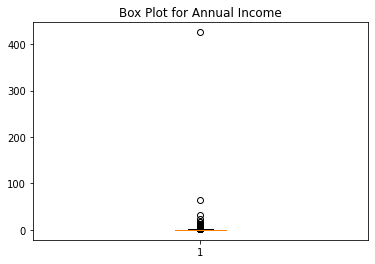

In [ ]:
'''In this code cell box plot for AMT_INCOME_TOTAL of X_train_final is plotted before outlier 
detection and removal'''

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot for Annual Income')
ax1.boxplot(X_train_final['AMT_INCOME_TOTAL'])

>Based on the above plot, it is observed that there are a lot of outliers.

## 6.3 LOF (Local Outlier Factor) based outlier detection and removal

In [ ]:
'''In this code cell LOF based outlier detection model from pyod called CBLOF is defined 
and fit upon X_train_final. Outliers are detected and a column named outlier is created 
which indicated whether adatapoint is outlier or inlier.'''

#Define outlier detector and fit it to X_train_final with contamination = 0.05
clf = CBLOF(contamination=0.05, check_estimator=False, random_state=42)
clf.fit(X_train_final)
scores_pred = clf.decision_function(X_train_final) * -1

#Predict the datapoints as outlier or inlier
outlier_prediction = clf.predict(X_train_final)
inliers = len(outlier_prediction) - np.count_nonzero(outlier_prediction)
outliers = np.count_nonzero(outlier_prediction == 1)

#Create dataframe named X_train_final_outlier with all the columns of X_train_final and an 
#additional column showing whether a datapoint is outlier or not
X_train_final_outlier = X_train_final.copy()
X_train_final_outlier['outlier'] = outlier_prediction.tolist()

In [ ]:
'''In this code cell new dataframes are created after removing outliers'''

#Create new training dataset named X_train_final_outlier_removed and new target values 
#named y_train_outlier_removed with outliers removed
y_train_outlier = y_train.copy()
X_y_train_final_outlier = pd.concat([X_train_final_outlier, y_train_outlier], axis = 1)
X_y_train_final_outlier_removed = X_y_train_final_outlier[X_y_train_final_outlier['outlier'] != 1]
X_train_final_outlier_removed = X_y_train_final_outlier_removed.drop(columns = ['TARGET', 'outlier'])
y_train_final_outlier_removed = X_y_train_final_outlier_removed['TARGET']

## 6.4 Box plot for annual income before outlier removal

{'boxes': [<matplotlib.lines.Line2D at 0x7fa35f382fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa35f38f0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa35f396110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa35f38fb90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa35f38b610>,
  <matplotlib.lines.Line2D at 0x7fa35f38bb50>]}

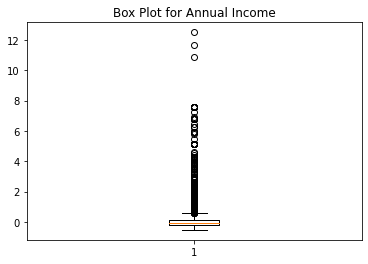

In [ ]:
'''In this code cell box plot for AMT_INCOME_TOTAL of X_train_final is plotted after outlier 
detection and removal'''

#Plot box plot for AMT_INCOME_TOTAL of X_train_final_outlier_removed
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot for Annual Income')
ax1.boxplot(X_train_final_outlier_removed['AMT_INCOME_TOTAL'])

>It is observed that the box plot has improved significantly after outlier removal.

In [ ]:
'''This code cell gives us the percentage of loans where default has been observed and 
percentage of loan where no default has been observed'''

total_0 = len(X_y_train_final_outlier_removed[X_y_train_final_outlier_removed['TARGET'] == 0])
total_1 = len(X_y_train_final_outlier_removed[X_y_train_final_outlier_removed['TARGET'] == 1])
print("Percentage of TARGET 0: ", '%.2f'%(total_0*100/(total_0 + total_1)))
print("Percentage of TARGET 1: ", '%.2f'%(total_1*100/(total_0 + total_1)))

Percentage of TARGET 0:  91.82
Percentage of TARGET 1:  8.18


> No significant change in percentage of Target 0 and Target 1 values is observed with removal of outliers.

## 6.5 Create a restore point
Datasets generated at this point are saved as csv files and uploaded to google drive for future use. This is done because of RAM limitation on google colaboratory. Also it allows to run diffent sections independently.

In [ ]:
'''In this code cell final data sets with outliers removed are saved and downloaded as csv files. 
These are uploaded to google drive for future access.'''

#Save the dataframes into CSV files for future use
X_train_final_outlier_removed.to_csv('X_train_final_outlier_removed.csv', index = False)
files.download("X_train_final_outlier_removed.csv")
y_train_final_outlier_removed.to_csv('y_train_final_outlier_removed.csv', index = False)
files.download("y_train_final_outlier_removed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 7.0 Feature selection
Following actions are performed in this section:
*   Import relevant data and print their shape
*   XGBoost based feature importance
*   Gradient Boosting based feature importance
*   Feature selection from top 225 features based on XGBoost and Gradient Boosting
*   Create a restore point

## 7.1 Import data and print shape

In [ ]:
'''In this code cell data from the required csv files are imported'''

#Read X_train_final_feature_selected
X_train_final_outlier_removed = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/X_train_final_outlier_removed.csv')

#Read y_train_final_feature_selected
y_train_final_outlier_removed = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/y_train_final_outlier_removed.csv')

#Read X_validate_final
X_validate_final = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/X_validate_final.csv')

#Read y_validate
y_validate = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/y_validate.csv')

#Read X_test_final
X_test_final = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/X_test_final.csv')

#Read y_test
y_test = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/y_test.csv')

#Read application_test_final_ohe_combined
application_test_final_ohe_combined = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/application_test_final_ohe_combined.csv')

#Read NUMERICAL_COLUMN
numerical_col = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/NUMERICAL_COLUMN.csv')

In [ ]:
'''In this code cell shapes of datasets imported above are printed'''

print(X_train_final_outlier_removed.shape)
print(y_train_final_outlier_removed.shape)
print(X_validate_final.shape)
print(y_validate.shape)
print(X_test_final.shape)
print(y_test.shape)
print(application_test_final_ohe_combined.shape)
print(numerical_col.shape)

(204494, 444)
(204494, 1)
(46127, 444)
(46127, 1)
(46127, 444)
(46127, 1)
(48744, 444)
(138, 1)


## 7.2 XGBoost based feature slecetion

In [ ]:
'''In this code cell XGBoost based classifier is defined and fit on X_train_final_outlier_removed 
and y_train_final_outlier_removed'''

xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train_final_outlier_removed, y_train_final_outlier_removed)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(random_state=42)

In [ ]:
'''In this code cell dataframe consisting of columns and their importance is created. 
This data frame is further sorted in descending order of feature importance.'''

#Create dataframe
data1 = {'COLUMN': X_train_final_outlier_removed.columns,
        'SCORE': xgb.feature_importances_}
Column_Score1 = pd.DataFrame(data1)

#Sort dataframe by decreasing importance scores
Column_Score_sorted1 = Column_Score1.sort_values(by='SCORE', ascending=False)

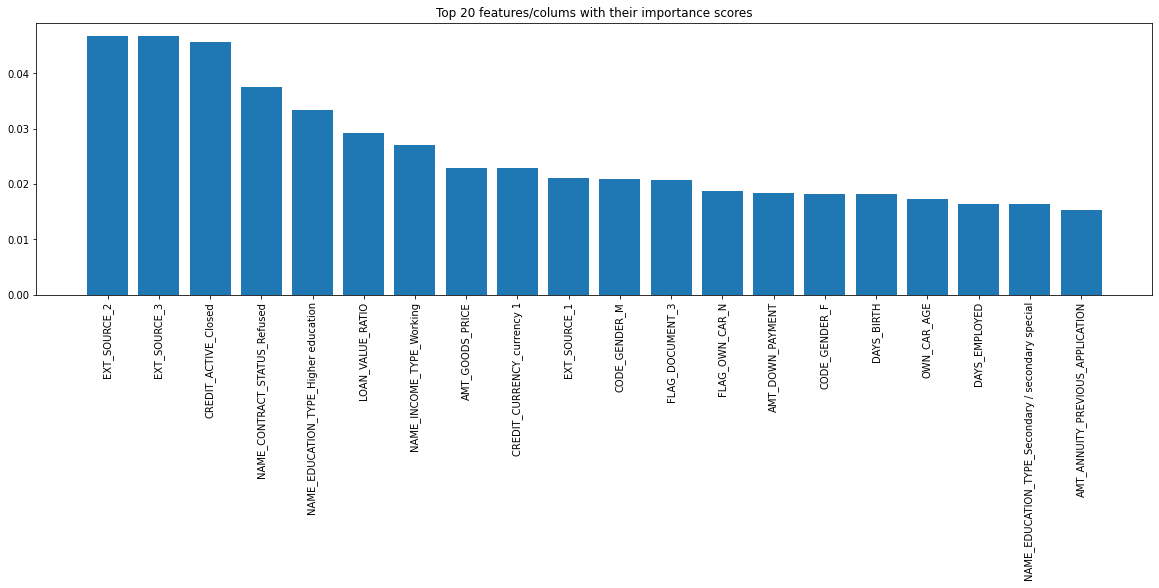

In [ ]:
'''In this code cell a graph plot of top 20 features and their importance is plotted.'''

column1 = Column_Score_sorted1['COLUMN'][0:20]
score1 = Column_Score_sorted1['SCORE'][0:20]
 
plt.figure(figsize =(20, 5))
plt.bar(column1, score1)
plt.xticks(rotation=90)
plt.title('Top 20 features/colums with their importance scores')
plt.show()

In [ ]:
'''In this code cell top 225 features are selected based on XGBoost'''

feature_selected_xgb = Column_Score_sorted1["COLUMN"][0:225]

## 7.3 Gradient Boosting based feature slecetion

In [ ]:
'''In this code cell Grradient Boosting based classifier is defined and fit on 
X_train_final_outlier_removed and y_train_final_outlier_removed'''

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train_final_outlier_removed, y_train_final_outlier_removed)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
'''In this code cell dataframe consisting of columns and their importance is created. 
This data frame is further sorted in descending order of feature importance.'''

#Create dataframe
data2 = {'COLUMN': X_train_final_outlier_removed.columns,
        'SCORE': gb.feature_importances_}
Column_Score2 = pd.DataFrame(data2)

#Sort dataframe by decreasing importance scores
Column_Score_sorted2 = Column_Score2.sort_values(by='SCORE', ascending=False)

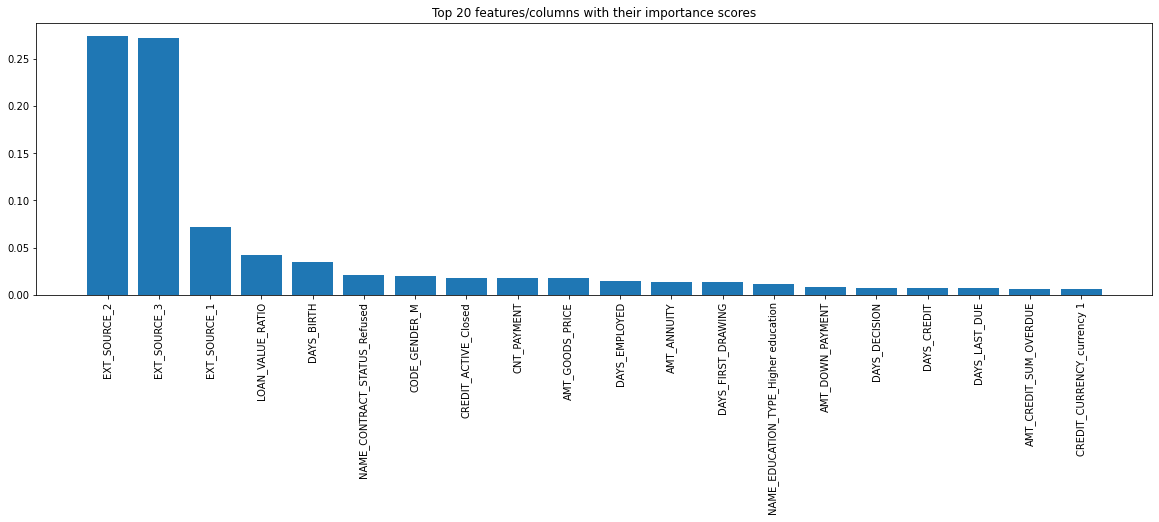

In [ ]:
'''In this code cell a graph plot of top 20 features and their importance is plotted.'''

column2 = Column_Score_sorted2['COLUMN'][0:20]
score2 = Column_Score_sorted2['SCORE'][0:20]
 
plt.figure(figsize =(20, 5))
plt.bar(column2, score2)
plt.xticks(rotation=90)
plt.title('Top 20 features/columns with their importance scores')
plt.show()

In [ ]:
'''In this code cell top 225 features are selected based on GBDT'''

feature_selected_gbdt = Column_Score_sorted2["COLUMN"][0:225]

## 7.4 Feature selection

In [ ]:
'''In this code cell features common in top 225 features selected based on ExtraClassifier 
and XGBoost are put in a list and its length is printed'''

feature_selected = list(set(feature_selected_gbdt) & set(feature_selected_xgb))
print(len(feature_selected))

176


In [ ]:
'''In this code cell selected features are printed as list'''

print(list(feature_selected))

['NAME_HOUSING_TYPE_Municipal apartment', 'ORGANIZATION_TYPE_Construction', 'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE_Trade: type 3', 'NAME_CASH_LOAN_PURPOSE_Buying a home', 'NAME_FAMILY_STATUS_Married', 'ORGANIZATION_TYPE_Industry: type 13', 'ORGANIZATION_TYPE_Industry: type 8', 'ORGANIZATION_TYPE_Transport: type 3', 'NAME_CLIENT_TYPE_Refreshed', 'DAYS_BIRTH', 'WEEKDAY_APPR_PROCESS_START_PREVIOUS_APPLICATION_SATURDAY', 'CREDIT_TYPE_Microloan', 'YEARS_BEGINEXPLUATATION_AVG', 'FLAG_LAST_APPL_PER_CONTRACT_Y', 'HOUSETYPE_MODE_terraced house', 'NAME_GOODS_CATEGORY_Gardening', 'AMT_ANNUITY', 'ORGANIZATION_TYPE_Culture', 'WEEKDAY_APPR_PROCESS_START_SATURDAY', 'NAME_HOUSING_TYPE_With parents', 'CODE_GENDER_XNA', 'CREDIT_ACTIVE_Sold', 'WEEKDAY_APPR_PROCESS_START_PREVIOUS_APPLICATION_MONDAY', 'AMT_REQ_CREDIT_BUREAU_QRT', 'PRODUCT_COMBINATION_POS household without interest', 'FLAG_LAST_APPL_PER_CONTRACT_N', 'LOAN_INCOME_RATIO', 'AMT_CREDIT_MAX_OVERDUE', 'OCCUPATION_TYPE_Private service s

> We observe that the additional features created - DEBT_INCOME_RATIO, LOAN_INCOME_RATIO, LOAN_VALUE_RATIO - during feature engineering figure in this list of selected features.

                                      REGION_RATING_CLIENT_W_CITY  ...  DAYS_FIRST_DUE
REGION_RATING_CLIENT_W_CITY                              1.000000  ...       -0.009183
DAYS_BIRTH                                               0.011864  ...        0.008468
YEARS_BEGINEXPLUATATION_AVG                              0.035539  ...       -0.001765
AMT_ANNUITY                                             -0.129389  ...       -0.000515
AMT_REQ_CREDIT_BUREAU_QRT                                0.006809  ...        0.025291
LOAN_INCOME_RATIO                                        0.062781  ...       -0.005542
AMT_CREDIT_MAX_OVERDUE                                  -0.006877  ...       -0.000301
AMT_GOODS_PRICE_PREVIOUS_APPLICATION                    -0.070661  ...       -0.003838
DAYS_LAST_DUE                                            0.015467  ...        0.312531
AMT_APPLICATION                                         -0.067549  ...       -0.026487
AMT_CREDIT_PREVIOUS_APPLICATION            

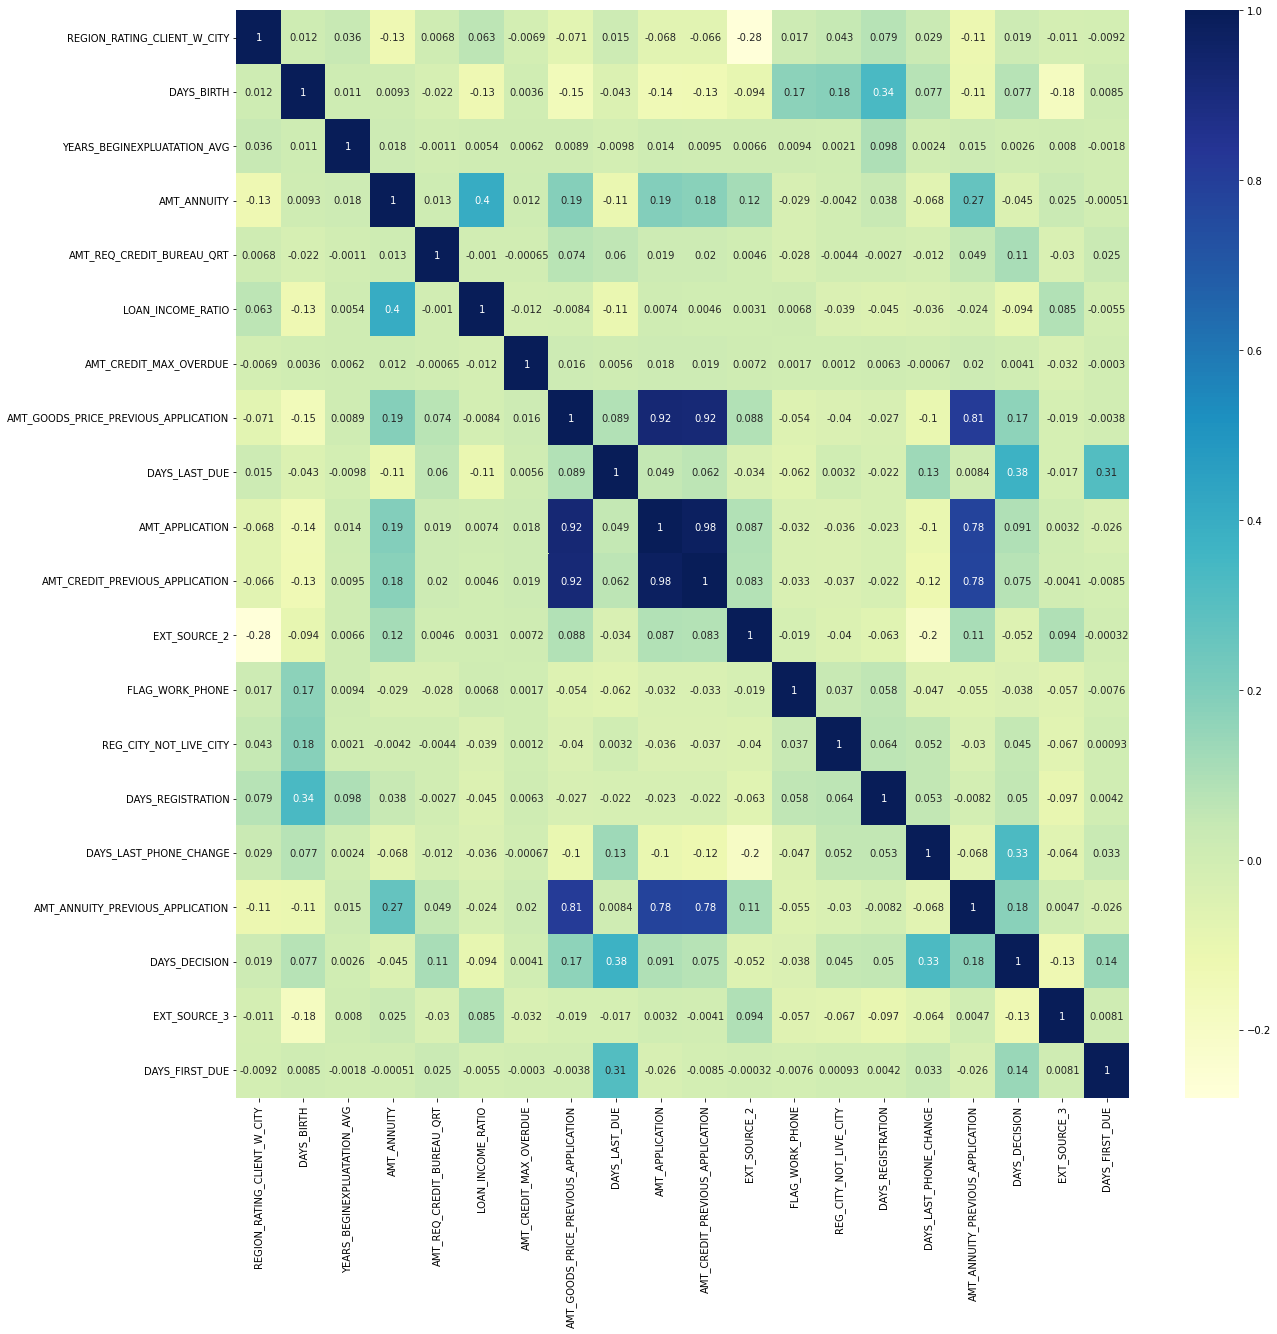

In [ ]:
'''In this code cell heat map based on correlation matrix is plotted'''

#Get list of numerical columns in numerical
numerical = list(numerical_col["COLUMN"].values)

#A list consisting of selected columns which were originally numerical is created.
feature_corr = []
for feature in feature_selected:
  if feature in numerical:
    feature_corr.append(feature)

#Print correlation matrix
print(X_train_final_outlier_removed[feature_corr[0:20]].corr())

print('-'*100)

#Plot heat map based on correlation matrix
plt.figure(figsize =(20, 20))
dataplot = sns.heatmap(X_train_final_outlier_removed[feature_corr[0:20]].corr(), cmap="YlGnBu", annot=True)
plt.show()

> It is observed that only a few features are strongly correlated to other/others. From this perspective also feature selection is correctly done.

In [ ]:
'''In this code cell data sets with selected featurs are saved'''

#Create dataframes X_validate_final_feature_selected, X_test_final_feature_selected 
#and application_test_final_feature_selected with feature selected columns
X_train_final_feature_selected = X_train_final_outlier_removed[list(feature_selected)]
X_validate_final_feature_selected = X_validate_final[list(feature_selected)]
X_test_final_feature_selected = X_test_final[list(feature_selected)]
application_test_final_feature_selected = application_test_final_ohe_combined[list(feature_selected)]

#Copy y or target values for train, validate and test in variables with names similar to respective X
y_train_final_feature_selected = y_train_final_outlier_removed
y_validate_final_feature_selected = y_validate
y_test_final_feature_selected = y_test

## 7.5 Create a restore point
Datasets generated at this point are saved as csv files and uploaded to google drive for future use. This is done because of RAM limitation on google colaboratory. Also it allows to run diffent sections independently.

In [ ]:
'''In this code cell final data sets with selected featurs are saved and downloaded as csv files. These are uploaded to google drive for future access.'''

#Save the dataframes into CSV files for future use
X_train_final_feature_selected.to_csv('X_train_final_feature_selected.csv', index = False)
files.download("X_train_final_feature_selected.csv")
y_train_final_feature_selected.to_csv('y_train_final_feature_selected.csv', index = False)
files.download("y_train_final_feature_selected.csv")
X_validate_final_feature_selected.to_csv('X_validate_final_feature_selected.csv', index = False)
files.download("X_validate_final_feature_selected.csv")
y_validate_final_feature_selected.to_csv('y_validate_final_feature_selected.csv', index = False)
files.download("y_validate_final_feature_selected.csv")
X_test_final_feature_selected.to_csv('X_test_final_feature_selected.csv', index = False)
files.download("X_test_final_feature_selected.csv")
y_test_final_feature_selected.to_csv('y_test_final_feature_selected.csv', index = False)
files.download("y_test_final_feature_selected.csv")
application_test_final_feature_selected.to_csv('application_test_final_feature_selected.csv', index = False)
files.download("application_test_final_feature_selected.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 8.0 TSNE
TSNE is performed and clusters are plotted with different values of perplexity and iterations. Finally two combinations and their plots are retained. Final output is summarised below:
*   Import data
*   Perform TSNE with perpexity value of 30 and 1000 iterations
*   Perform TSNE with perpexity value of 50 and 1000 iterations



## 8.1 Import data

In [ ]:
'''In this code cell data from the required csv files are imported'''

#Read X_train_final_feature_selected
X_train_final_feature_selected = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/X_train_final_feature_selected.csv')

#Read y_train_final_feature_selected
y_train_final_feature_selected = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/y_train_final_feature_selected.csv')

In [ ]:
'''In this code cell shapes of datasets imported above are printed'''

print(X_train_final_feature_selected.shape)
print(y_train_final_feature_selected.shape)

(204494, 176)
(204494, 1)


## 8.2 Perform TSNE with perpexity value of 30 and 1000 iterations

In [ ]:
'''In this code cell TSNE is fit on X_train_final_feature_selected'''

#Fit X_train_final_feature_selected to TSNE
X_embedded = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate='auto', init='random').fit_transform(X_train_final_feature_selected)
print(X_embedded.shape)

(204494, 2)


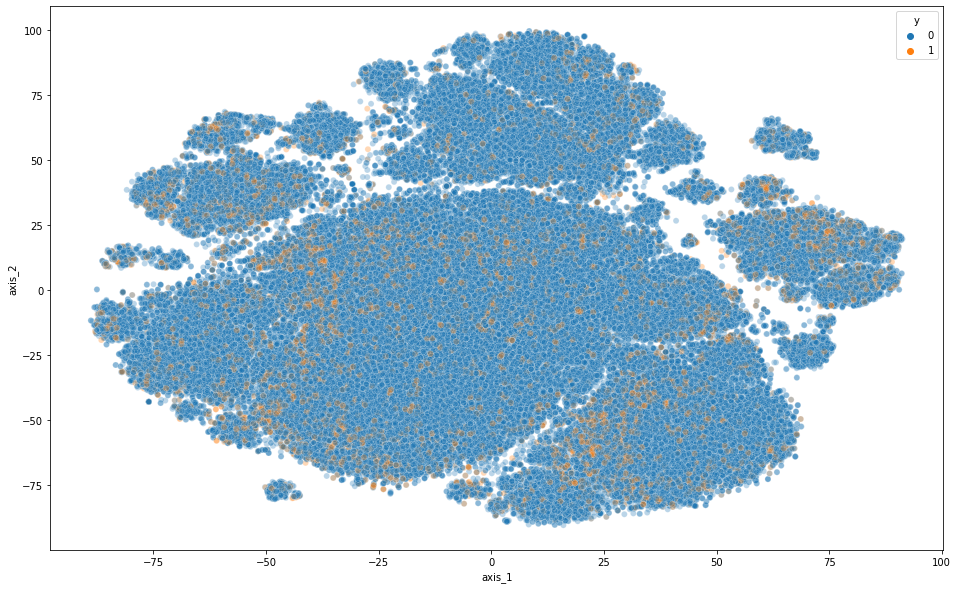

In [ ]:
'''In this code cell clusters are plotted'''

#Create dataframe with 2 dimensions obtained from TSNE and y/TARGET label
data = {"axis_1": X_embedded[:, 0],
        "axis_2": X_embedded[:, 1],
        "y": y_train_final_feature_selected.to_numpy().flatten()}
X_embedded_dataframe = pd.DataFrame(data)

#Plot scatter plot
plt.figure(figsize=(16,10))
sns.scatterplot(data=X_embedded_dataframe, x="axis_1", y="axis_2", hue="y", legend="full", alpha=0.3)

## 8.3 Perform TSNE with perpexity value of 50 and 1000 iterations

In [ ]:
'''In this code cell TSNE is fit on X_train_final_feature_selected'''

#Fit X_train_final_feature_selected to TSNE
X_embedded = TSNE(n_components=2, perplexity=50, n_iter=1000, learning_rate='auto', init='random').fit_transform(X_train_final_feature_selected)
print(X_embedded.shape)

(204494, 2)


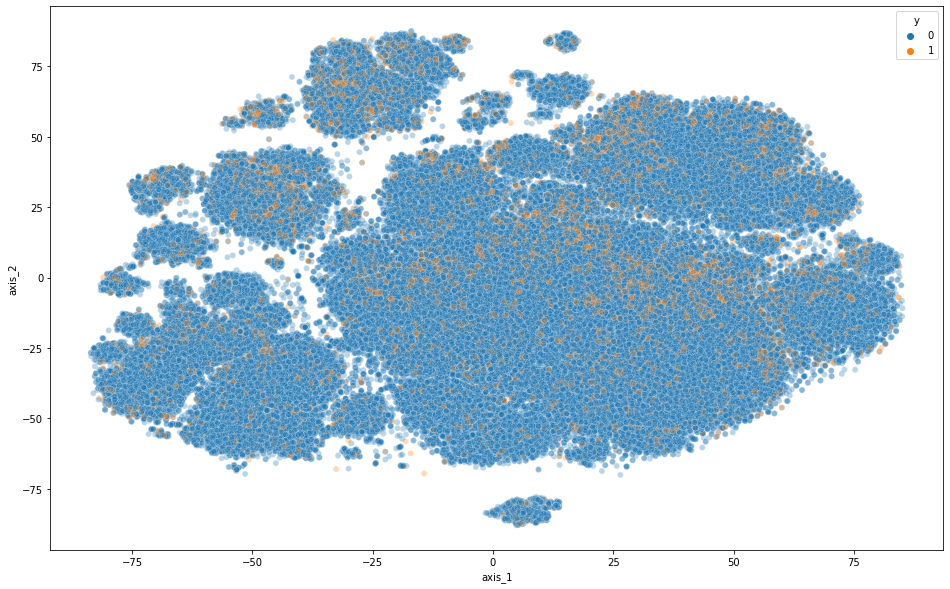

In [ ]:
'''In this code cell clusters are plotted'''

#Create dataframe with 2 dimensions obtained from TSNE and y/TARGET label
data = {'axis_1': X_embedded[:, 0],
        'axis_2': X_embedded[:, 1],
        'y': y_train_final_feature_selected.to_numpy().flatten()}
X_embedded_dataframe = pd.DataFrame(data)

#Plot scatter plot
plt.figure(figsize=(16,10))
sns.scatterplot(x="axis_1", y="axis_2", hue="y", data=X_embedded_dataframe, legend="full", alpha=0.3)

> Some clusters are obtained but the 2 target values are mixed. Separability based on target values shall be further evaluated after model training. Different models shall be tried.